# Predicting Unknown Values (Notebook 4 of 4) 

In [ ]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
import xgboost as xgb
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [166]:
# Importing the data
data = pd.read_csv('output_with_types.csv')
data

Unnamed: 0      osm_id  ncc_owned  osm_way_id  house_area  house_peri  \
0              3    35551462          1    35551462          66          34   
1             10    43078229          0    43078229          70          34   
2             18    61738722          0    61738722          65          32   
3            399    61739522          0    61739522          78          36   
4            990   227331222          0   227331222          70          34   
...          ...         ...        ...         ...         ...         ...   
2575        3587  1161677256          0  1161677256          51          30   
2576        3588  1161677257          0  1161677257          57          31   
2577        3589  1161677258          0  1161677258          52          30   
2578        3590  1161677259          0  1161677259          50          30   
2579        3591  1161677260          0  1161677260          51          30   

      house_vert private    house_lati  NATIONALCA  land_area  land_perim  \
0              8     YES  6.971754e+06  29324493.0      207.0        62.0   
1              4      NO  6.972089e+06  29416618.0     1261.0       151.0   
2              4      NO  6.972106e+06  29416618.0     1261.0       151.0   
3              4      NO  6.972057e+06  29416618.0     1261.0       151.0   
4              4      NO  6.972077e+06  29416618.0     1261.0       151.0   
...          ...     ...           ...         ...        ...         ...   
2575           4      NO  6.972124e+06  29473181.0      249.0        68.0   
2576           4      NO  6.972118e+06  29473181.0      249.0        68.0   
2577           4      NO  6.972130e+06  61944023.0      160.0        71.0   
2578           4      NO  6.972136e+06  61940774.0      161.0        72.0   
2579           4      NO  6.972112e+06  61940508.0      157.0        67.0   

      land_verti   land_longi    land_latit  COUNT  house_long  b2lpercent  \
0           12.0 -128367.6972  6.971752e+06      1  -128372.04        32.0   
1           36.0 -127157.2719  6.972083e+06      1  -127167.64         6.0   
2           36.0 -127157.2719  6.972083e+06      1  -127182.76         5.0   
3           36.0 -127157.2719  6.972083e+06      1  -127142.03         6.0   
4           36.0 -127157.2719  6.972083e+06      1  -127157.89         6.0   
...          ...          ...           ...    ...         ...         ...   
2575        11.0 -126524.4317  6.972113e+06      1  -126517.78        20.0   
2576        11.0 -126524.4317  6.972113e+06      2  -126511.29        23.0   
2577        11.0 -126531.5937  6.972125e+06      2  -126523.83        33.0   
2578         9.0 -126538.1983  6.972131e+06      2  -126529.85        31.0   
2579        14.0 -126511.7250  6.972107e+06      1  -126504.83        32.0   

     building_age_x building_age_y  
0        notDefined            NaN  
1        notDefined            NaN  
2        notDefined            NaN  
3        notDefined            NaN  
4        notDefined            NaN  
...             ...            ...  
2575     notDefined            NaN  
2576     notDefined            NaN  
2577     notDefined            NaN  
2578     notDefined            NaN  
2579     notDefined            NaN  

[2580 rows x 20 columns]

In [167]:
#drop column, "building_age_x" from df named data, and rename column, "building_age_y" as "building_age"

# Dropping the "building_age_x" column
data = data.drop(columns=['building_age_x'])

# Renaming the "building_age_y" column to "building_age"
data = data.rename(columns={'building_age_y': 'building_age'})

### Selecting data where 'building_age' is labelled

In [168]:
index=~data['building_age'].isna()

### Get index

In [169]:
labelled_data = data[index]

In [170]:
labelled_data

Unnamed: 0     osm_id  ncc_owned  osm_way_id  house_area  house_peri  \
19            34   61738758          0    61738758          61          38   
62           126   61738934          0    61738934          53          31   
63           127   61738936          0    61738936          83          39   
69           132   61738958          0    61738958          40          32   
73           135   61738962          0    61738962          49          36   
...          ...        ...        ...         ...         ...         ...   
2521        3516  815821956          1   815821956          43          27   
2522        3517  815821957          1   815821957          38          25   
2572        3568  866781899          1   866781899          50          30   
2573        3569  866781900          1   866781900          49          29   
2574        3573  970688350          1   970688350          45          27   

      house_vert private    house_lati  NATIONALCA  land_area  land_perim  \
19             8      NO  6.971471e+06  29393419.0       69.0        41.0   
62             8      NO  6.971390e+06  29403117.0      127.0        50.0   
63             4      NO  6.971303e+06  29399689.0      282.0        78.0   
69             6      NO  6.972130e+06  29374681.0      102.0        60.0   
73             6      NO  6.971576e+06  29370838.0      164.0        56.0   
...          ...     ...           ...         ...        ...         ...   
2521           4     YES  6.972389e+06  60841217.0      189.0        69.0   
2522           4     YES  6.972367e+06  60266631.0      126.0        58.0   
2572           6     YES  6.972128e+06  61301033.0      133.0        55.0   
2573           7     YES  6.972120e+06  61301008.0      137.0        51.0   
2574           4     YES  6.972354e+06  60175896.0      173.0        70.0   

      land_verti   land_longi    land_latit  COUNT  house_long  b2lpercent  \
19          12.0 -127468.5196  6.971467e+06      2  -127469.97        88.0   
62          12.0 -127334.2561  6.971393e+06      2  -127334.47        42.0   
63          25.0 -127391.7110  6.971309e+06      2  -127392.91        29.0   
69          14.0 -127724.8765  6.972138e+06      2  -127723.61        39.0   
73          10.0 -127794.9319  6.971576e+06      1  -127789.88        30.0   
...          ...          ...           ...    ...         ...         ...   
2521        17.0 -127254.7223  6.972392e+06      4  -127256.05        23.0   
2522        14.0 -127237.5003  6.972368e+06      5  -127237.20        30.0   
2572        17.0 -127108.9538  6.972127e+06      5  -127106.98        38.0   
2573        12.0 -127100.5090  6.972118e+06      5  -127099.87        36.0   
2574        16.0 -127224.4215  6.972355e+06      4  -127227.02        26.0   

      building_age  
19          modern  
62          modern  
63          modern  
69       victorian  
73       victorian  
...            ...  
2521  21st_century  
2522  21st_century  
2572  21st_century  
2573  21st_century  
2574  21st_century  

[242 rows x 19 columns]

In [171]:
labelled_data.describe()

Unnamed: 0        osm_id   ncc_owned    osm_way_id  house_area  \
count   242.000000  2.420000e+02  242.000000  2.420000e+02  242.000000   
mean   1714.690083  2.123613e+08    0.152893  2.123613e+08   54.880165   
std     976.073291  1.204573e+08    0.360630  1.204573e+08   27.473527   
min      34.000000  6.173876e+07    0.000000  6.173876e+07   13.000000   
25%     809.750000  2.262474e+08    0.000000  2.262474e+08   38.000000   
50%    1833.500000  2.292011e+08    0.000000  2.292011e+08   50.000000   
75%    2545.750000  2.301658e+08    0.000000  2.301658e+08   58.000000   
max    3573.000000  9.706884e+08    1.000000  9.706884e+08  223.000000   

       house_peri  house_vert    house_lati    NATIONALCA   land_area  \
count  242.000000  242.000000  2.420000e+02  2.420000e+02  242.000000   
mean    32.714876    5.966942  6.971800e+06  3.465441e+07  167.966942   
std      8.729054    2.014198  4.641811e+02  1.056864e+07  143.318983   
min     16.000000    4.000000  6.971109e+06  2.928795e+07   59.000000   
25%     27.000000    4.000000  6.971435e+06  2.937950e+07   93.250000   
50%     31.000000    6.000000  6.971647e+06  2.939643e+07  117.000000   
75%     38.000000    6.750000  6.972130e+06  2.944228e+07  164.750000   
max     73.000000   15.000000  6.972818e+06  6.130103e+07  809.000000   

       land_perim  land_verti     land_longi    land_latit       COUNT  \
count  242.000000  242.000000     242.000000  2.420000e+02  242.000000   
mean    60.219008   14.016529 -127484.175382  6.971800e+06    2.082645   
std     20.477231    6.011722     421.254383  4.640800e+02    0.729768   
min     38.000000    4.000000 -128855.655500  6.971113e+06    1.000000   
25%     48.000000   10.250000 -127672.705900  6.971435e+06    2.000000   
50%     52.500000   13.000000 -127461.793400  6.971644e+06    2.000000   
75%     63.000000   15.000000 -127205.770200  6.972135e+06    2.000000   
max    126.000000   54.000000 -126781.239700  6.972822e+06    5.000000   

          house_long  b2lpercent  
count     242.000000  242.000000  
mean  -127486.733512   40.925620  
std       418.259389   17.301172  
min   -128856.370000    2.000000  
25%   -127677.207500   29.000000  
50%   -127463.820000   40.000000  
75%   -127206.822500   50.000000  
max   -126798.120000   98.000000

In [172]:
labelled_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242 entries, 19 to 2574
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    242 non-null    int64  
 1   osm_id        242 non-null    int64  
 2   ncc_owned     242 non-null    int64  
 3   osm_way_id    242 non-null    int64  
 4   house_area    242 non-null    int64  
 5   house_peri    242 non-null    int64  
 6   house_vert    242 non-null    int64  
 7   private       242 non-null    object 
 8   house_lati    242 non-null    float64
 9   NATIONALCA    242 non-null    float64
 10  land_area     242 non-null    float64
 11  land_perim    242 non-null    float64
 12  land_verti    242 non-null    float64
 13  land_longi    242 non-null    float64
 14  land_latit    242 non-null    float64
 15  COUNT         242 non-null    int64  
 16  house_long    242 non-null    float64
 17  b2lpercent    242 non-null    float64
 18  building_age  242 non-null  

In [173]:
labelled_data.shape

(242, 19)

In [174]:
labelled_data['building_age'].value_counts()

inter_war       59
victorian       57
modern          56
post_war        52
21st_century    18
Name: building_age, dtype: int64

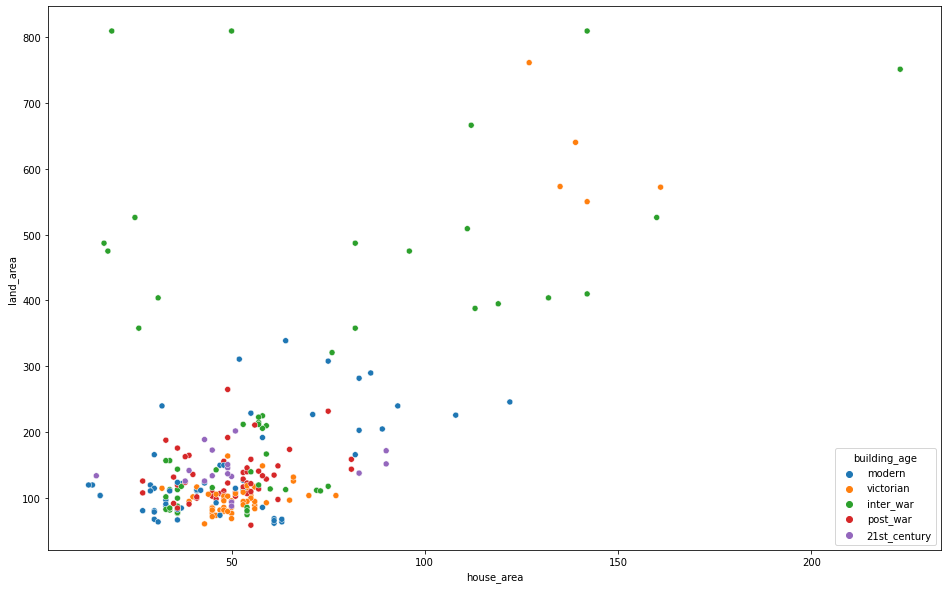

In [175]:
plt.figure(figsize=(16, 10))
sns.scatterplot(x="house_area", y="land_area", hue="building_age", data=labelled_data)
plt.show()

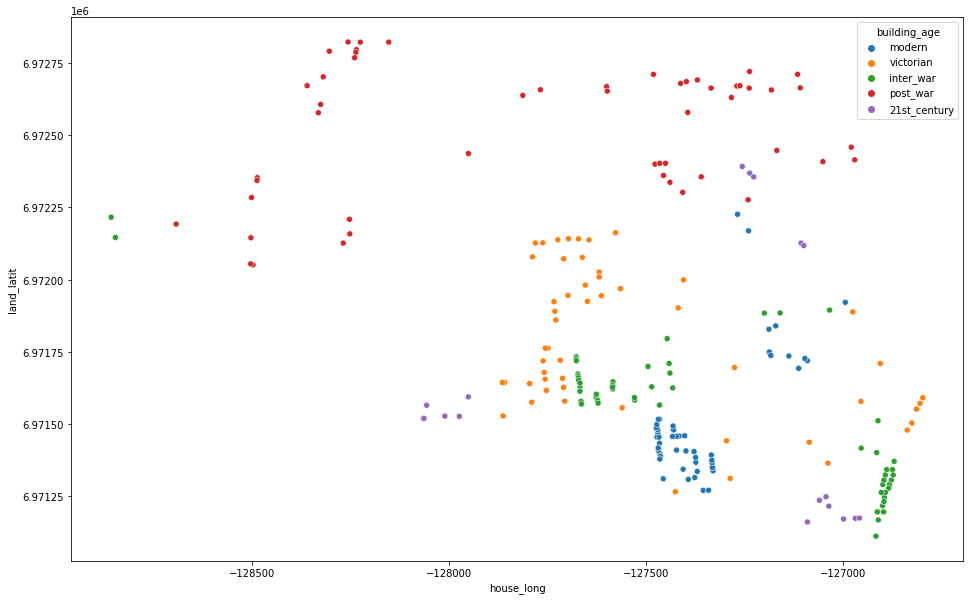

In [176]:
plt.figure(figsize=(16, 10))
sns.scatterplot(x="house_long", y="land_latit", hue="building_age", data=labelled_data)
plt.show()

In [177]:
labelled_data.columns

Index(['Unnamed: 0', 'osm_id', 'ncc_owned', 'osm_way_id', 'house_area',
       'house_peri', 'house_vert', 'private', 'house_lati', 'NATIONALCA',
       'land_area', 'land_perim', 'land_verti', 'land_longi', 'land_latit',
       'COUNT', 'house_long', 'b2lpercent', 'building_age'],
      dtype='object')

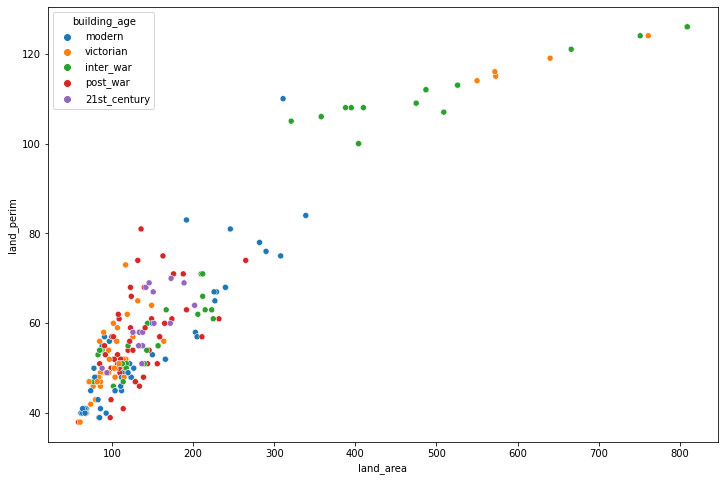

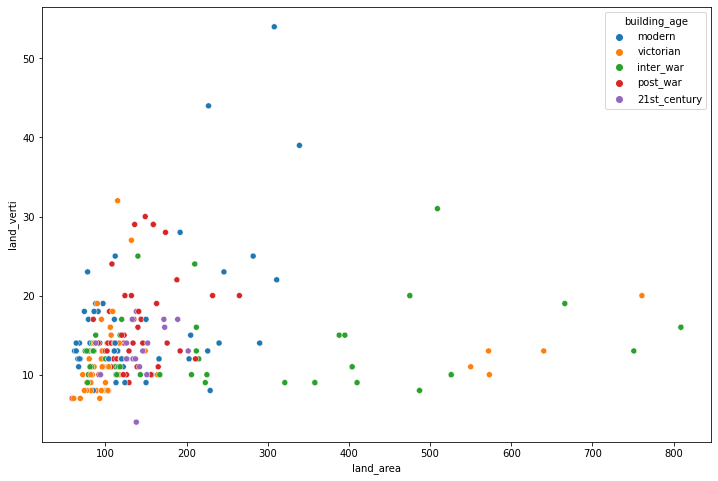

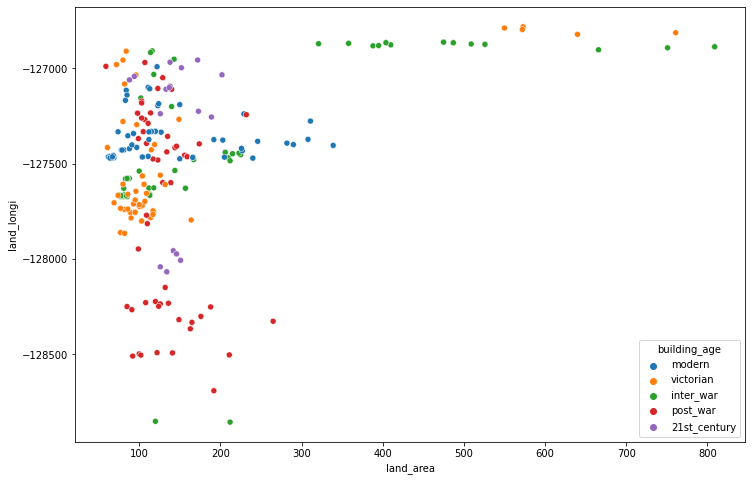

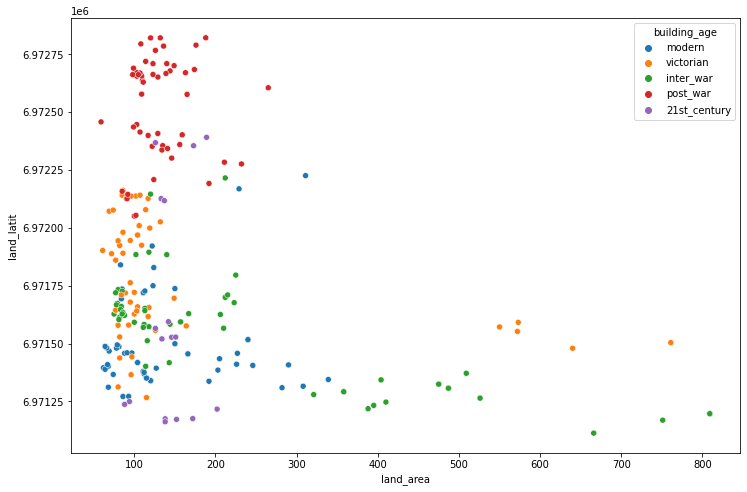

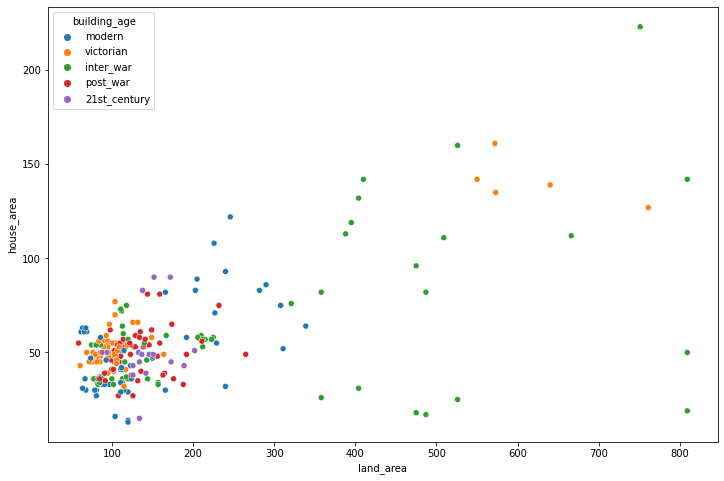

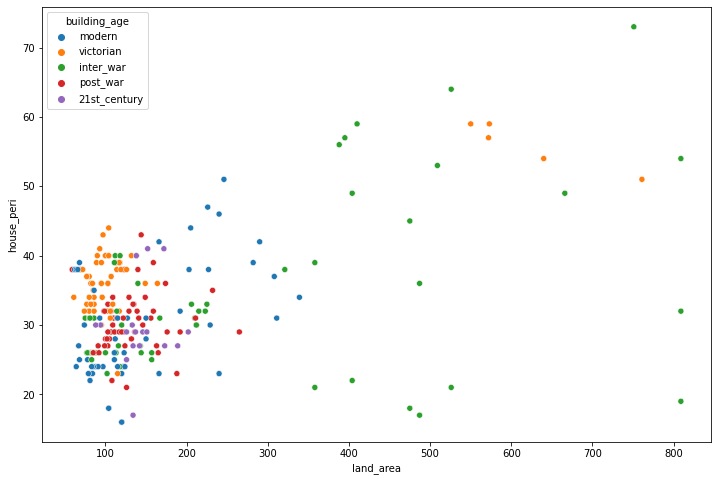

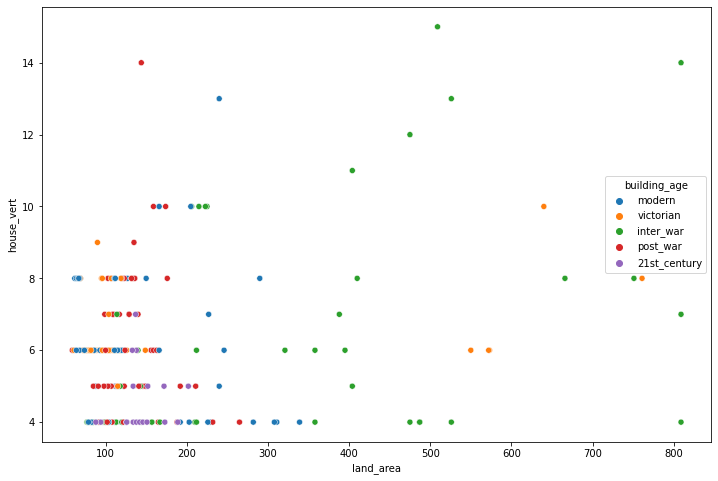

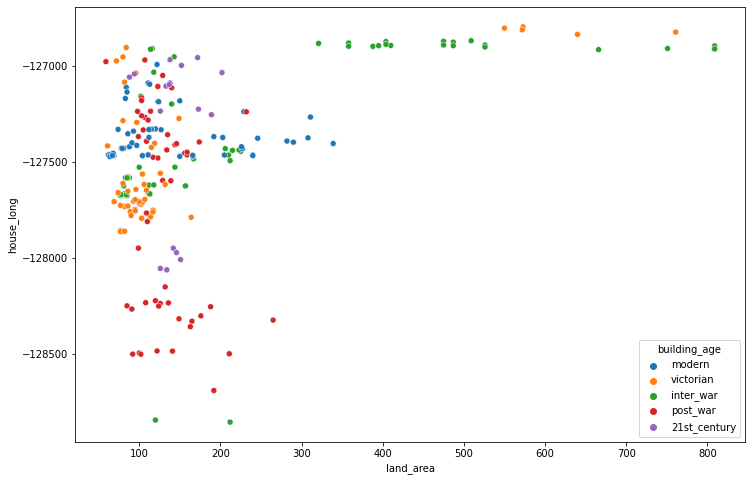

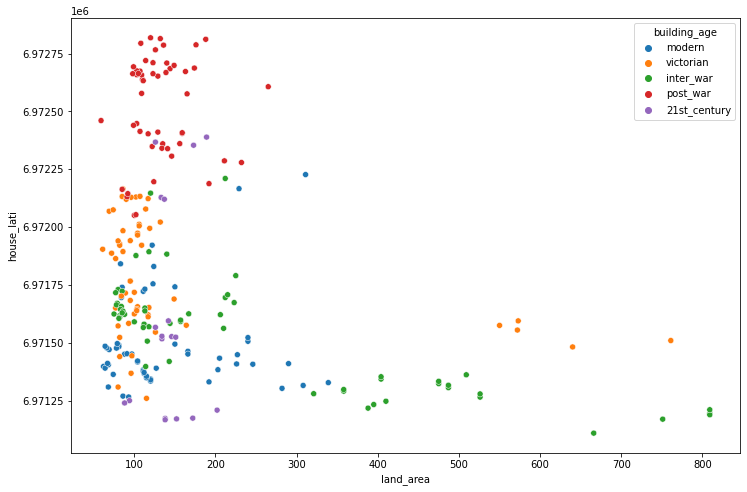

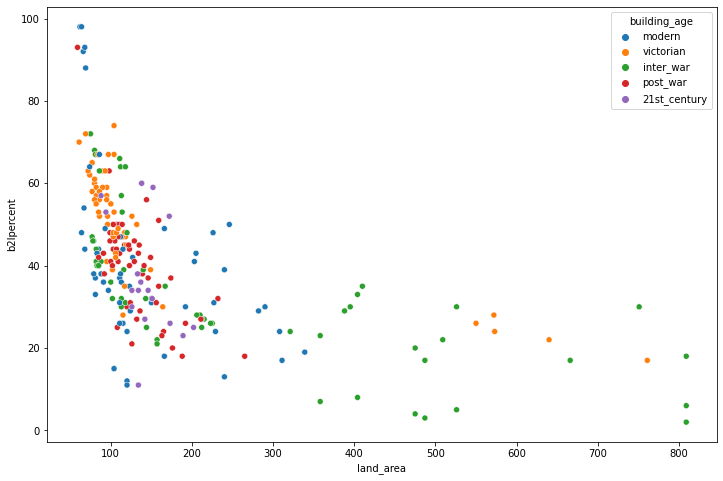

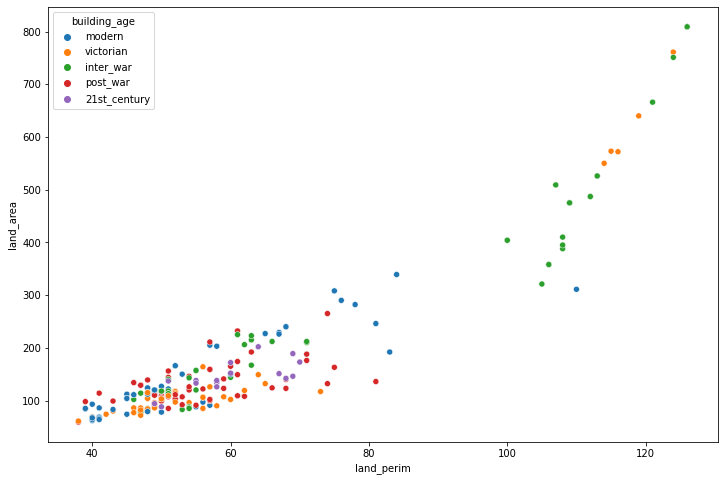

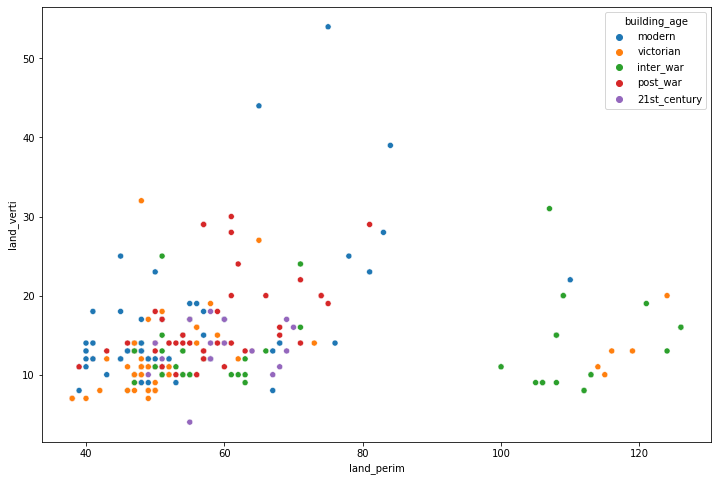

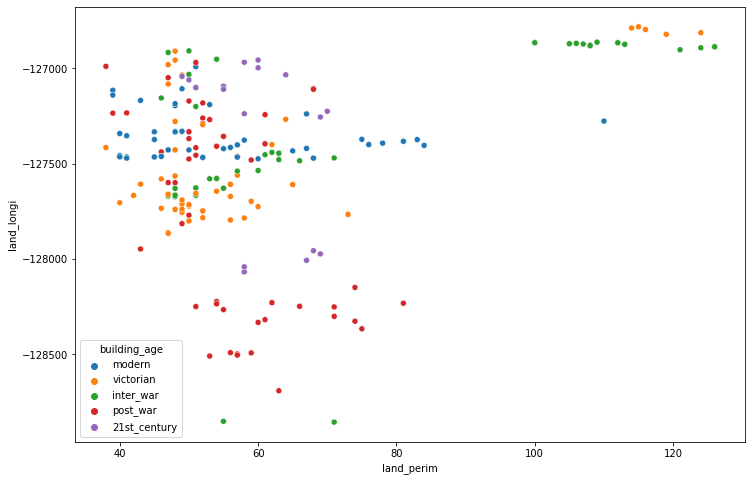

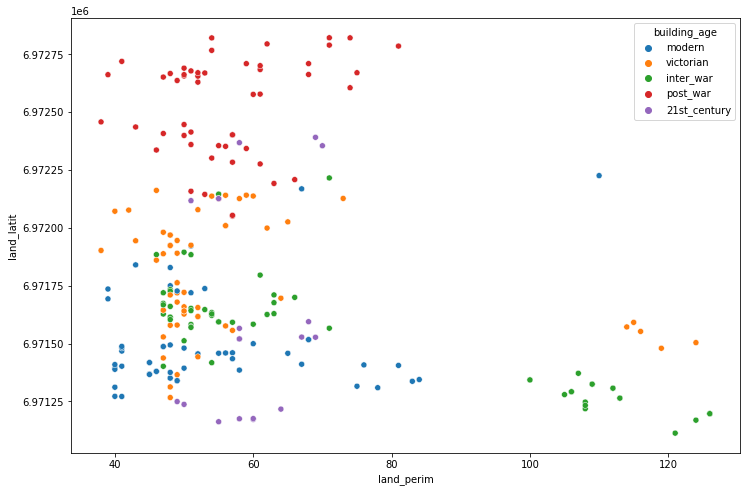

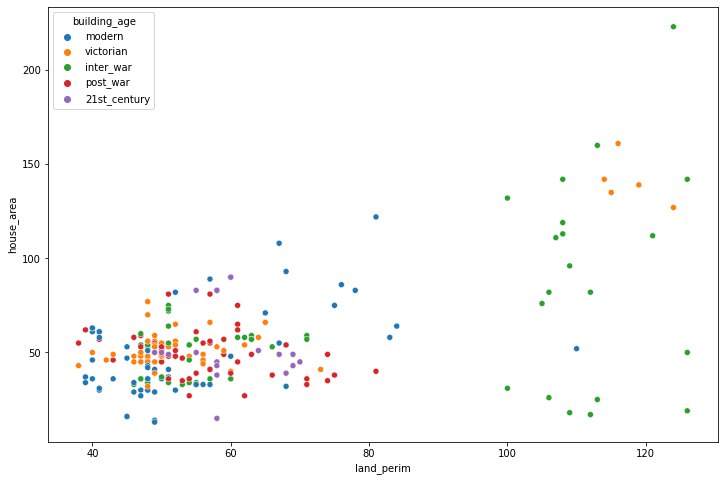

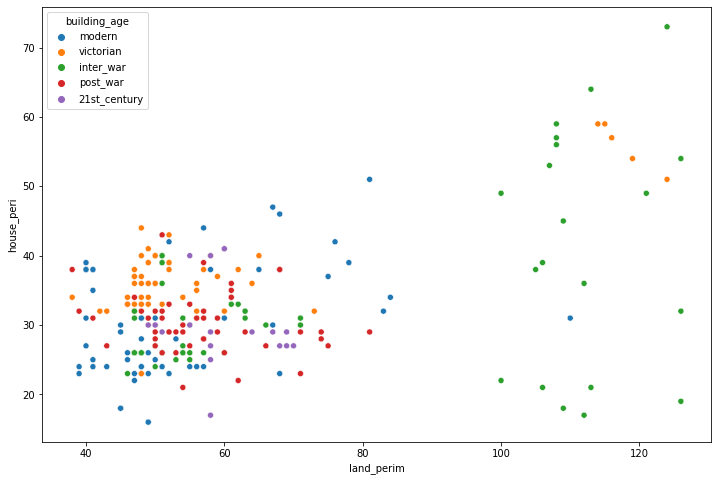

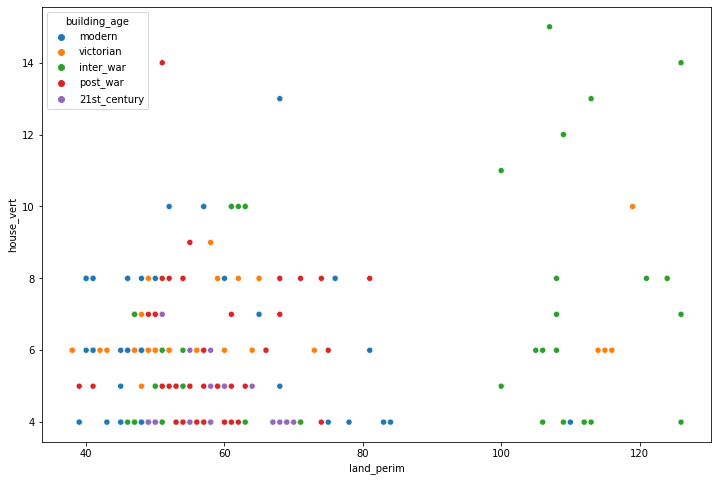

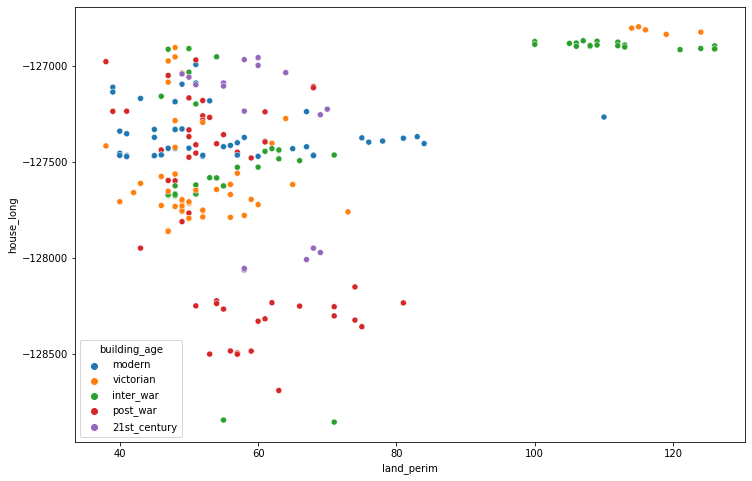

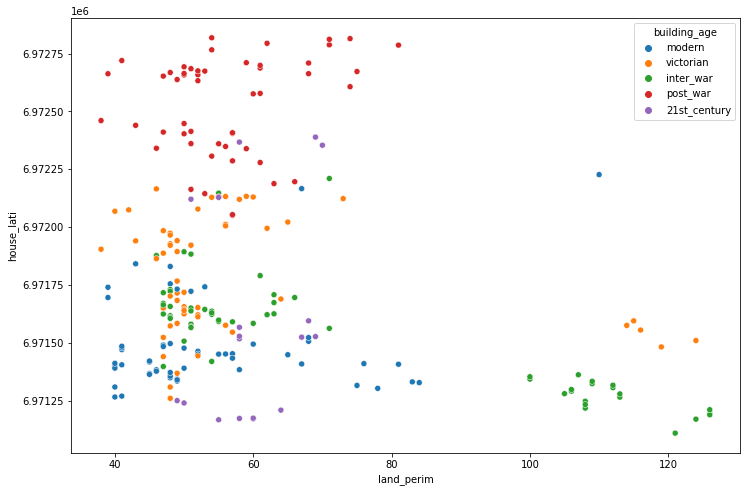

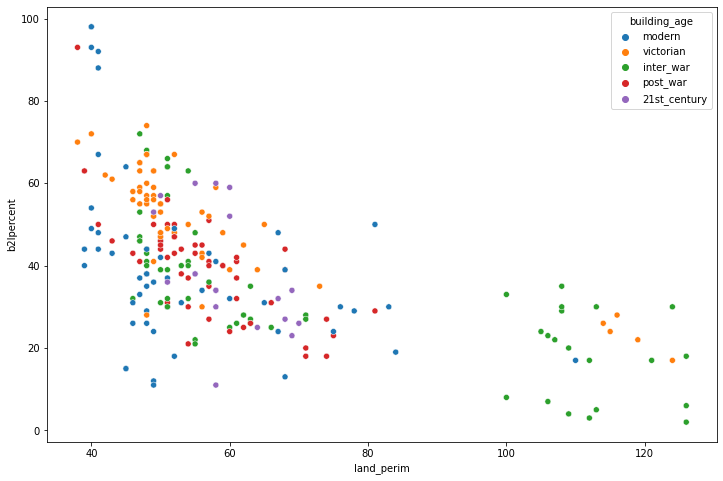

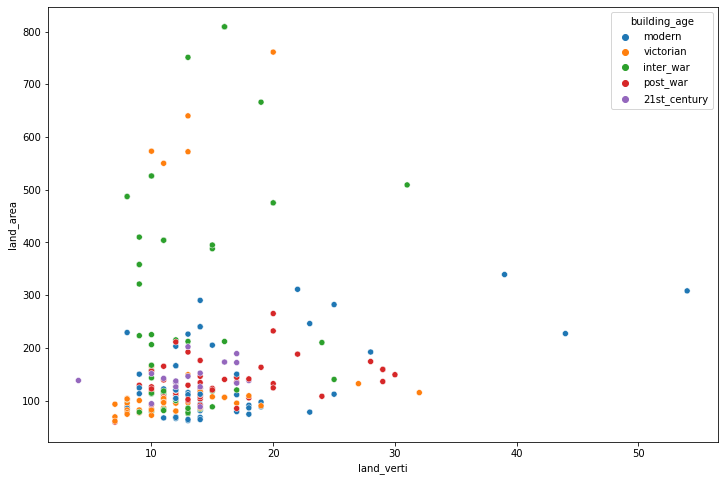

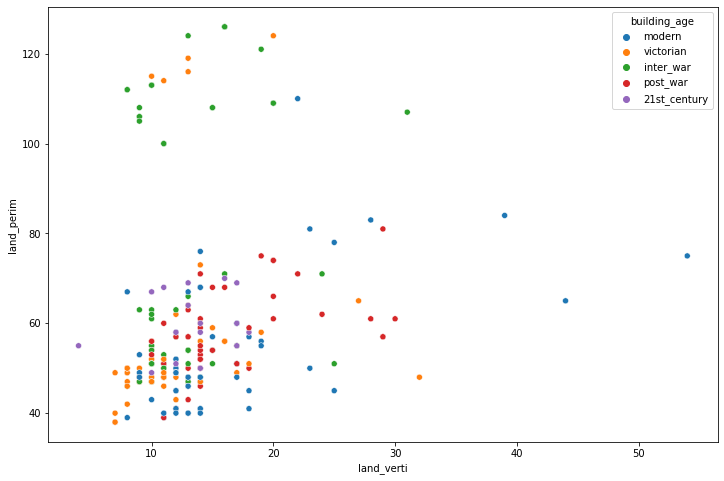

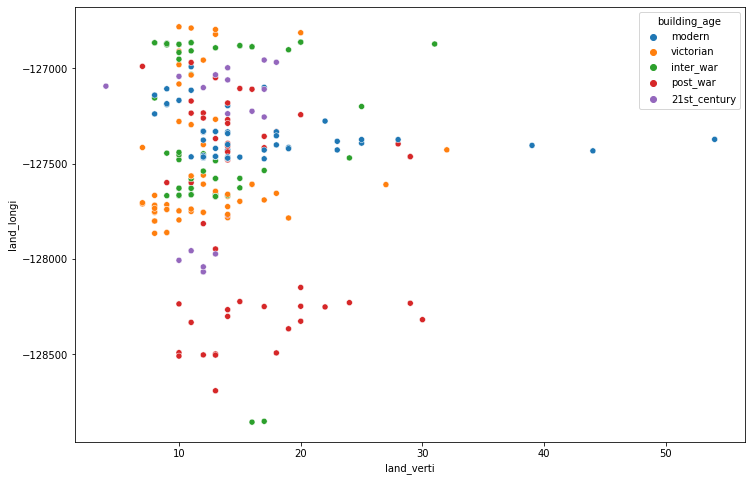

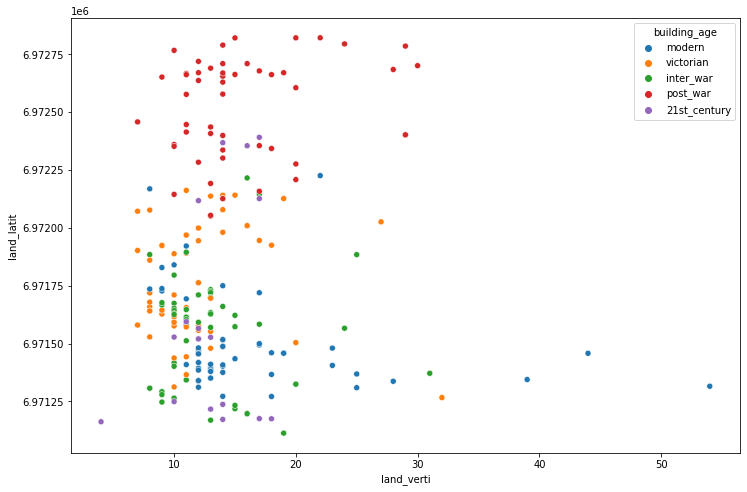

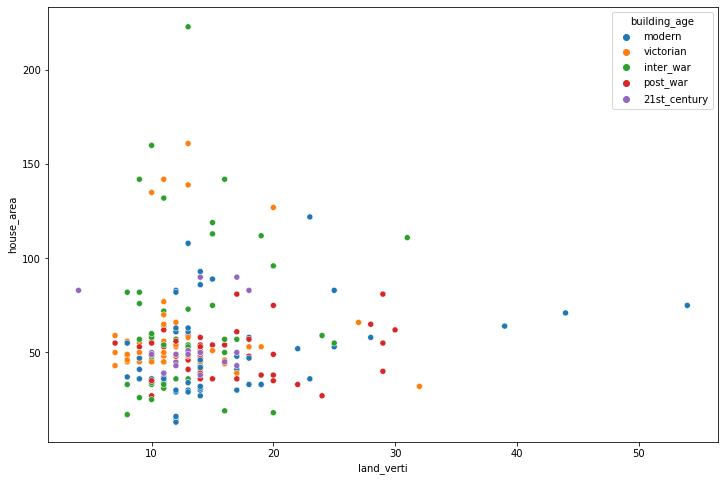

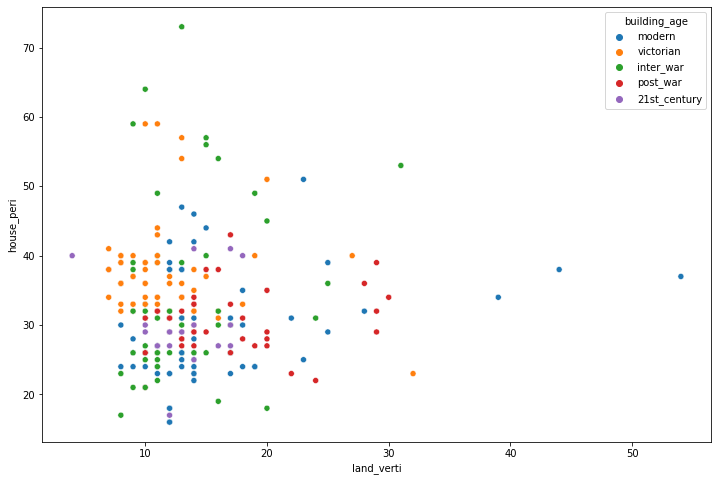

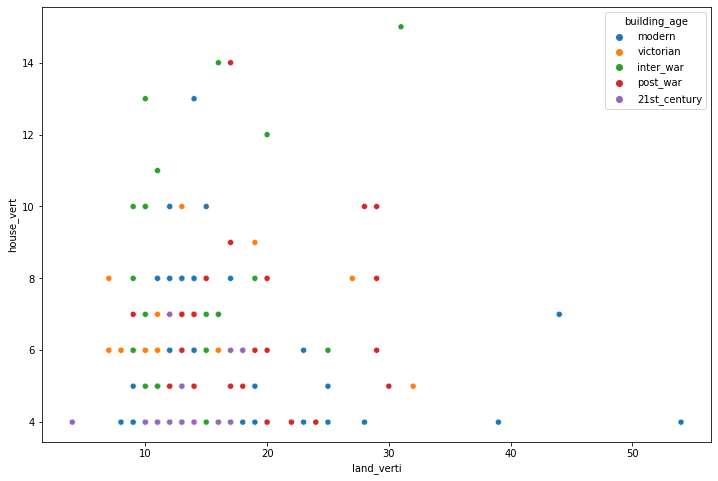

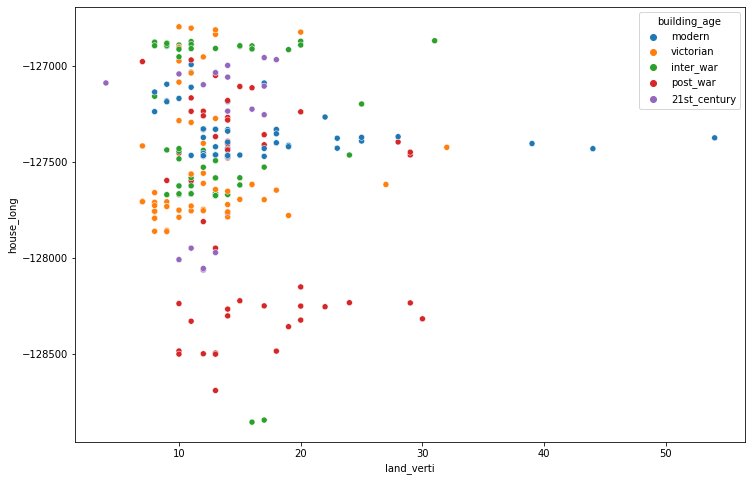

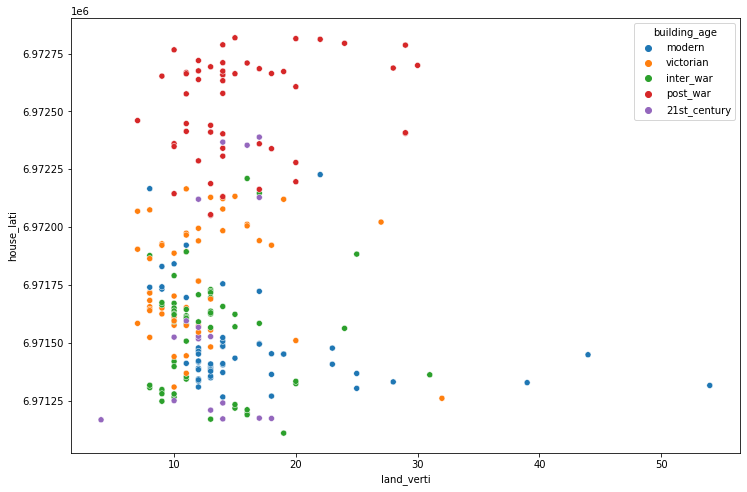

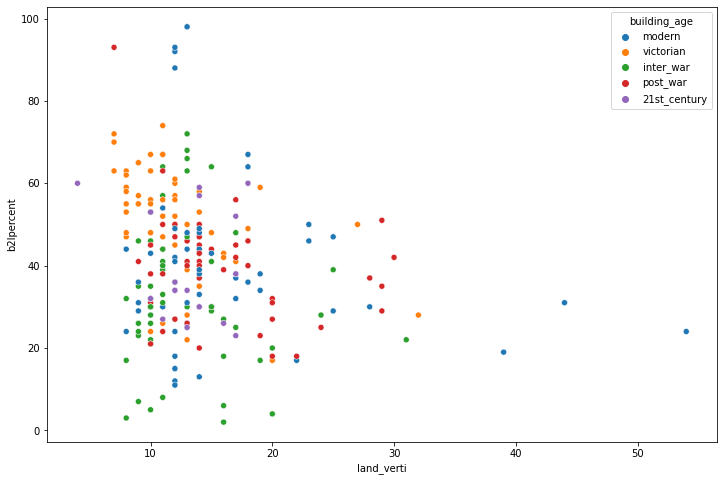

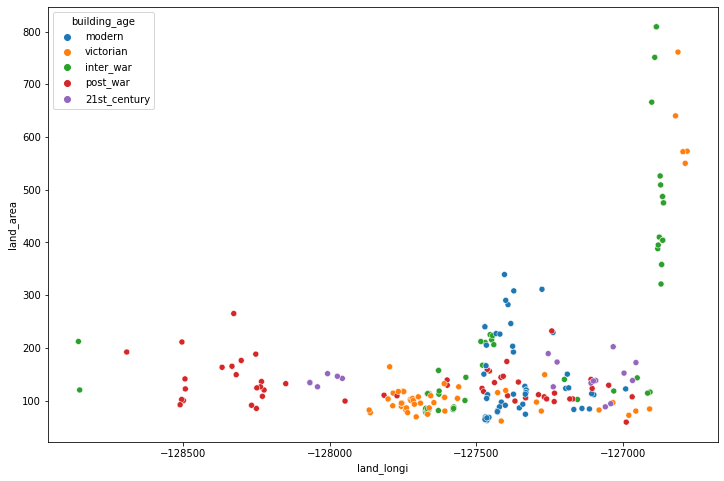

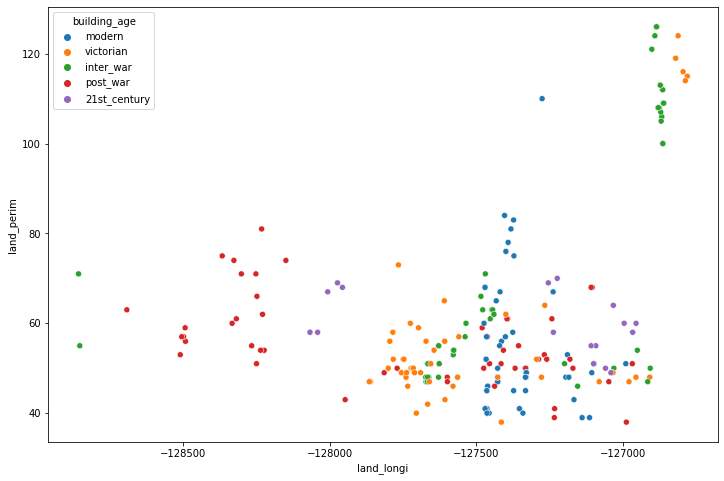

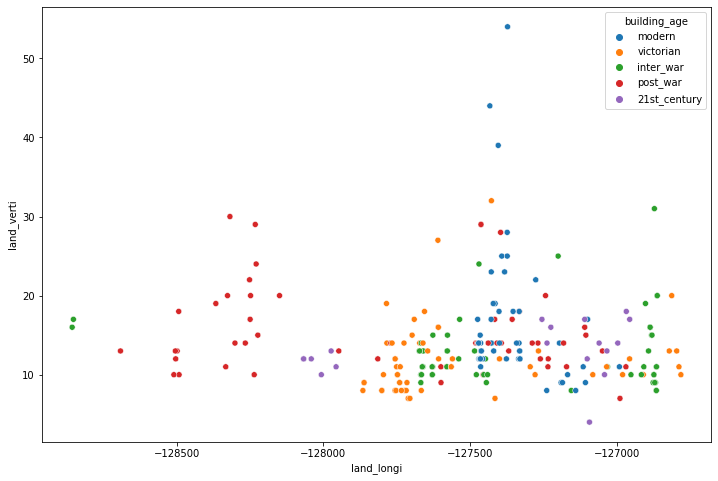

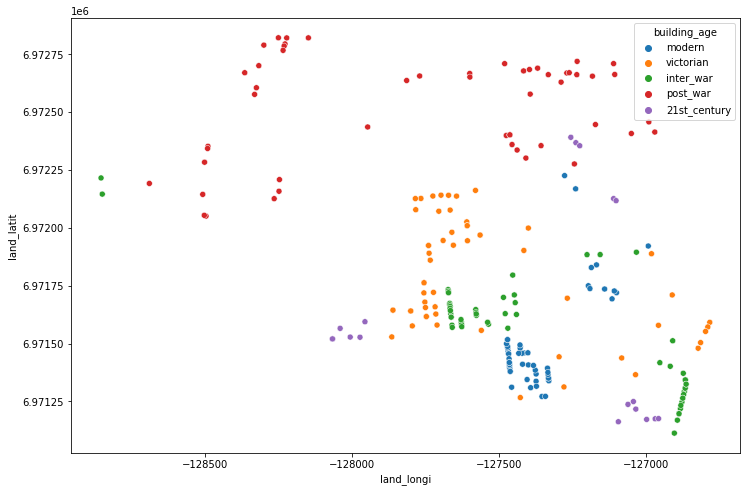

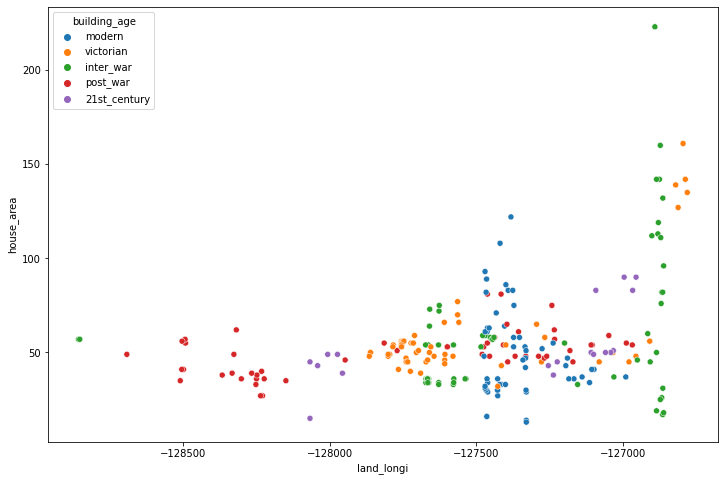

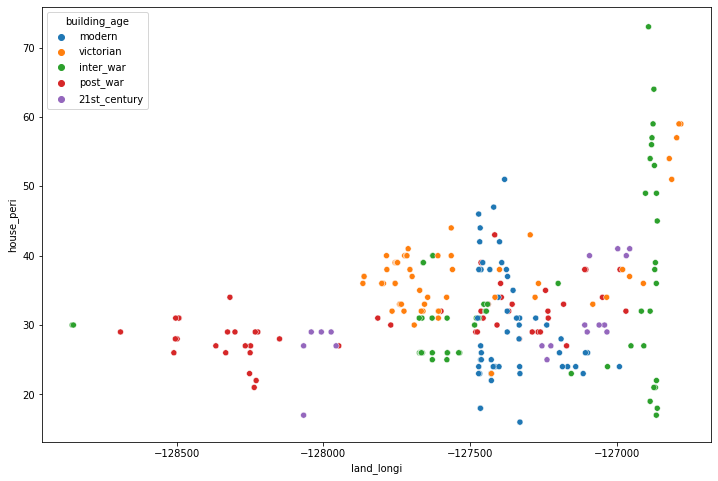

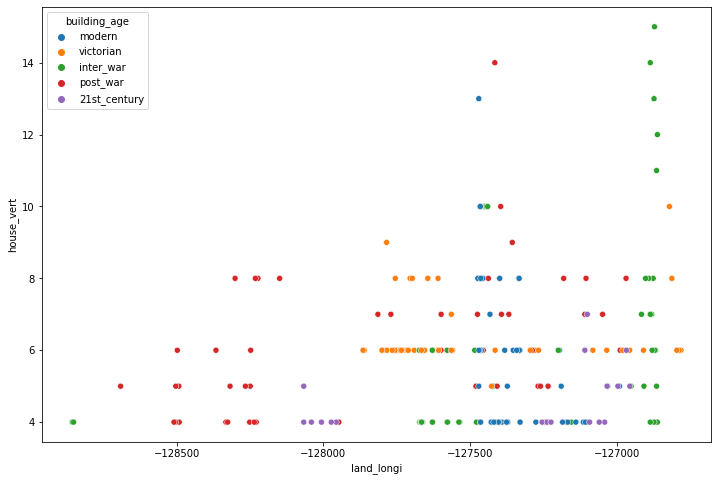

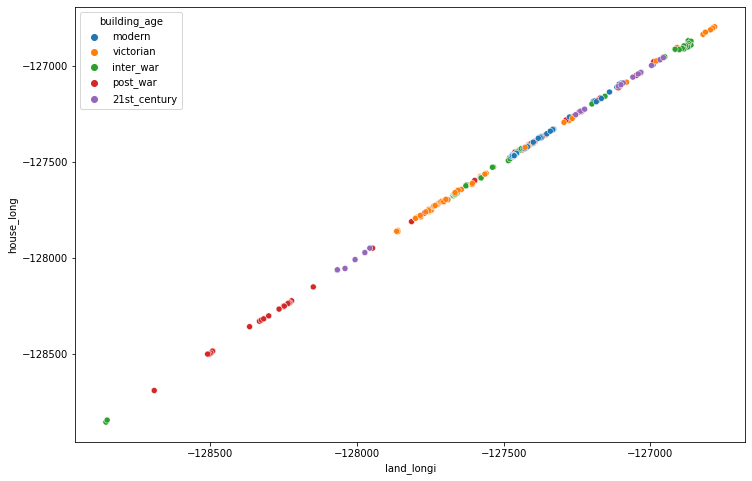

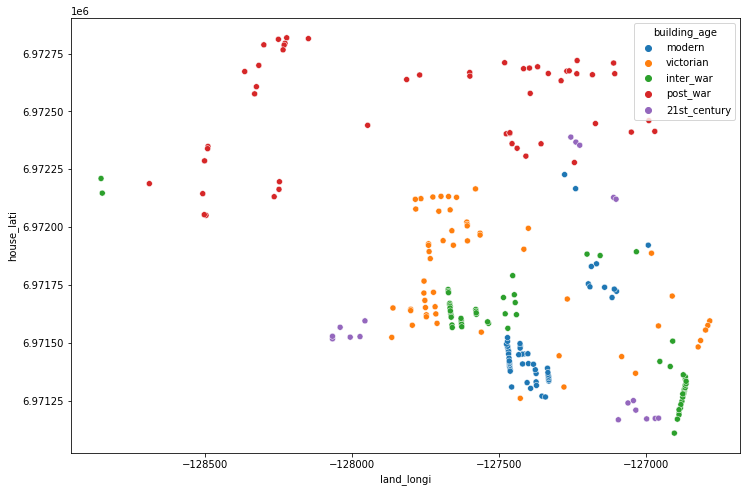

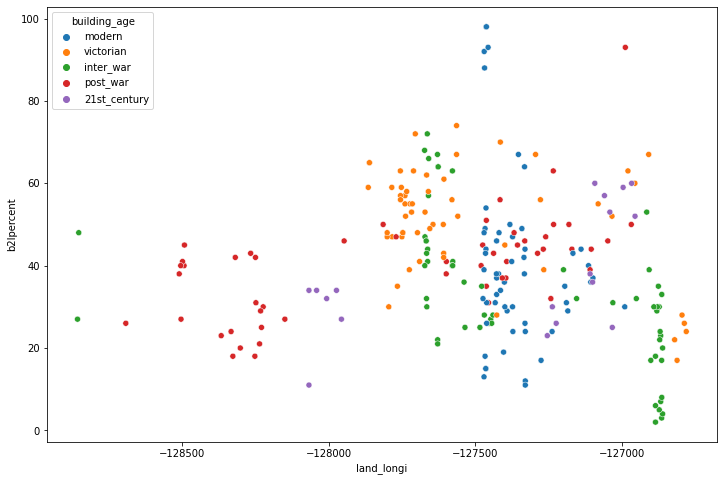

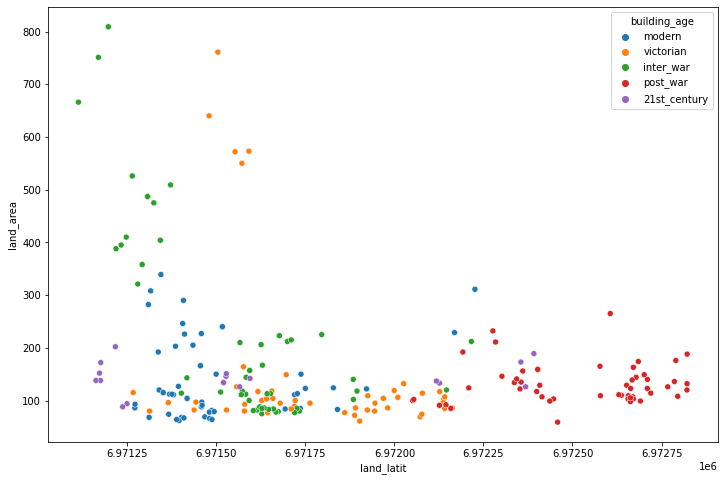

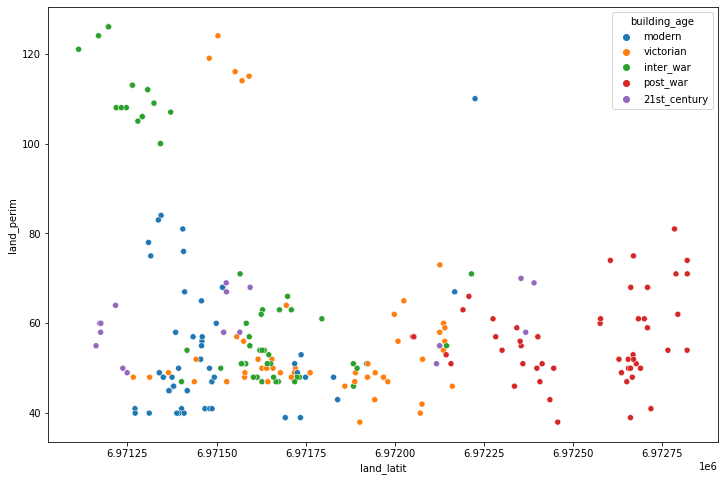

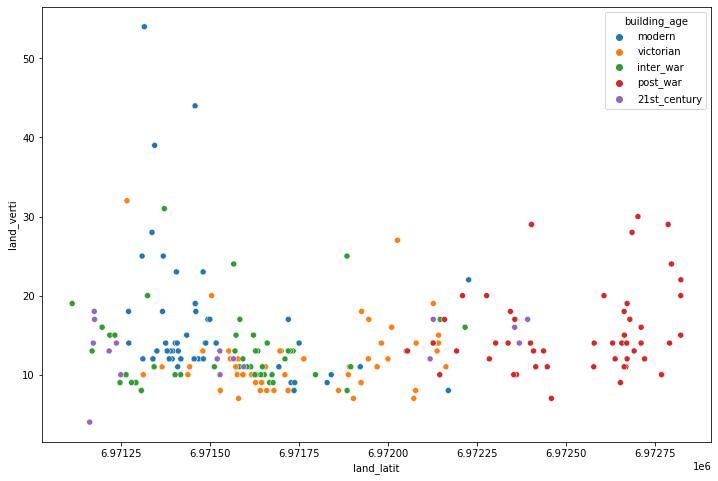

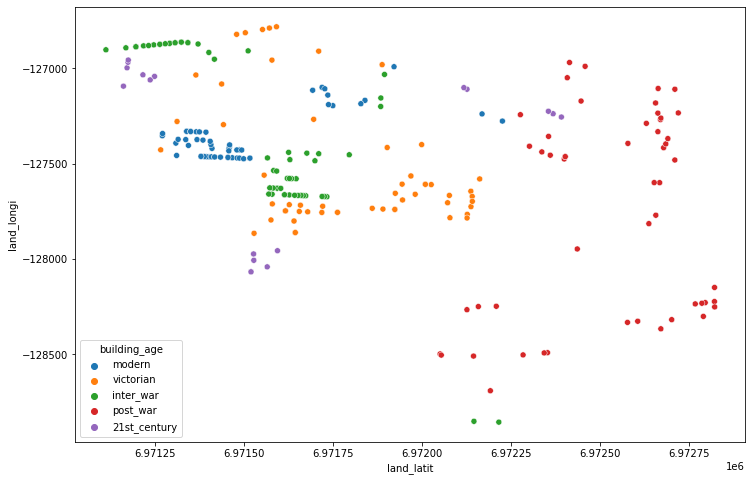

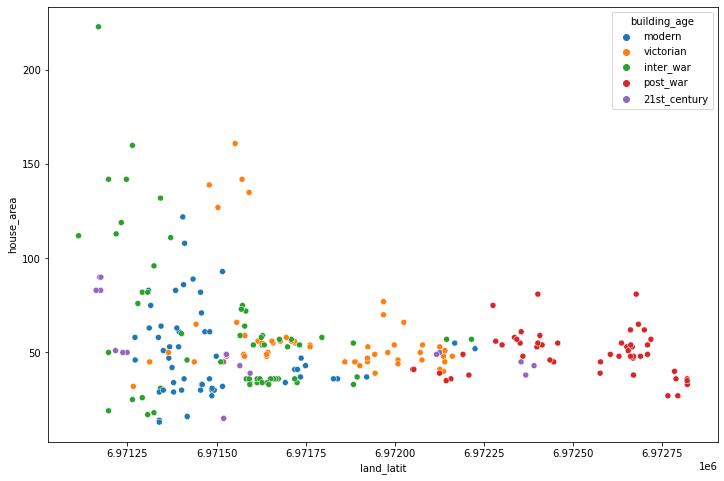

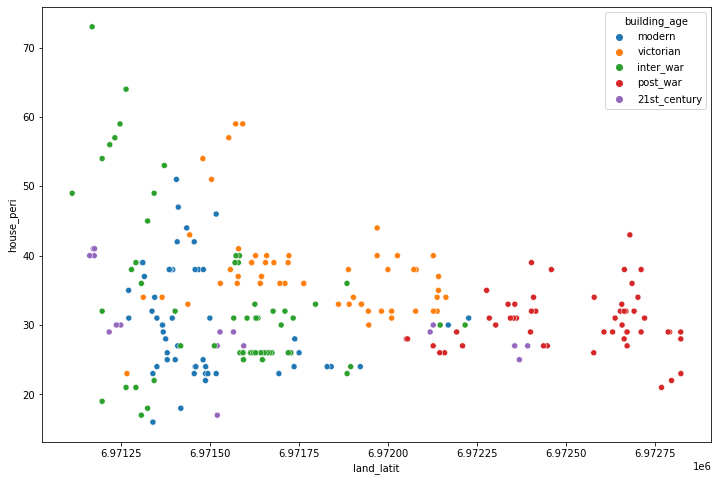

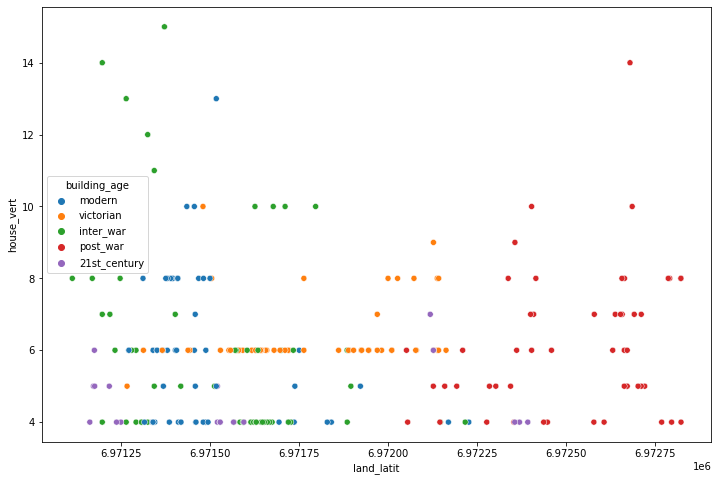

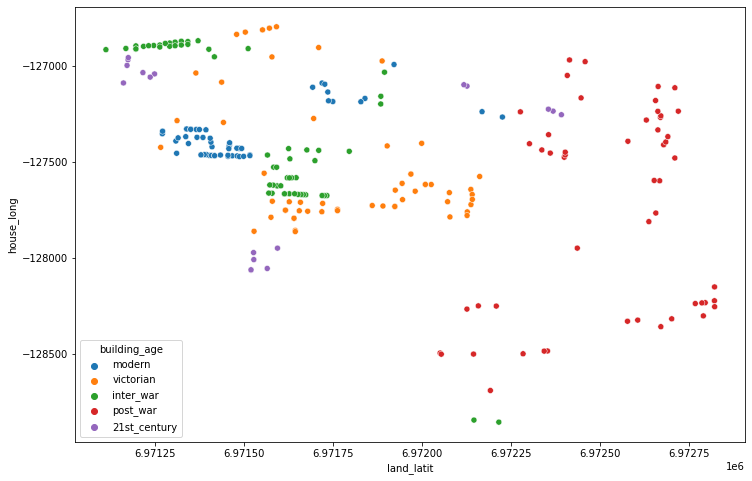

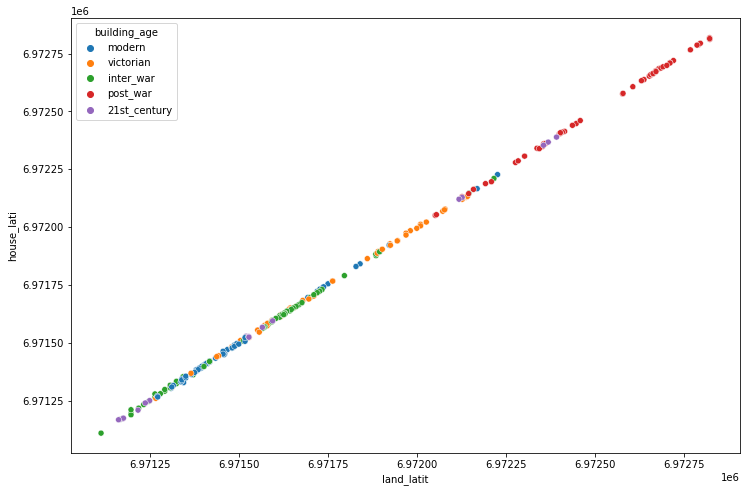

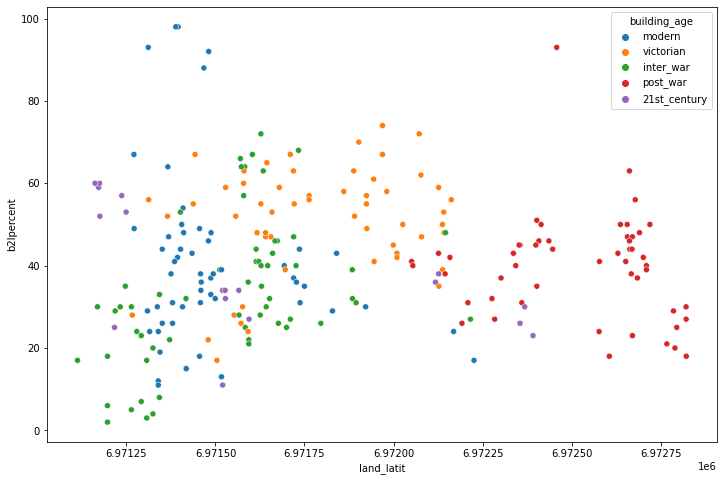

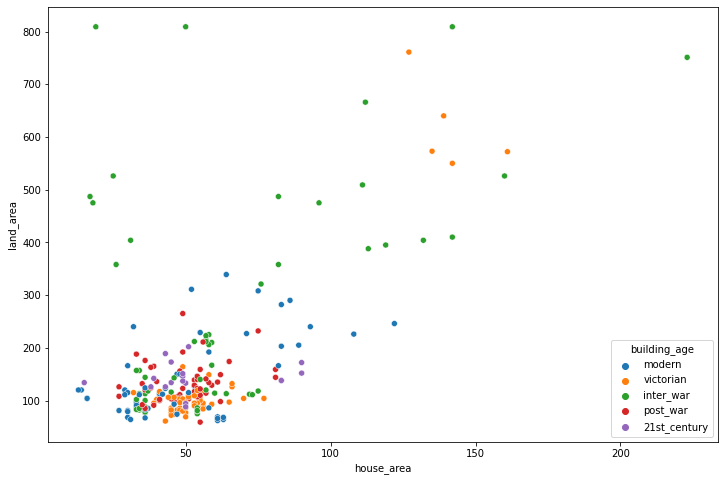

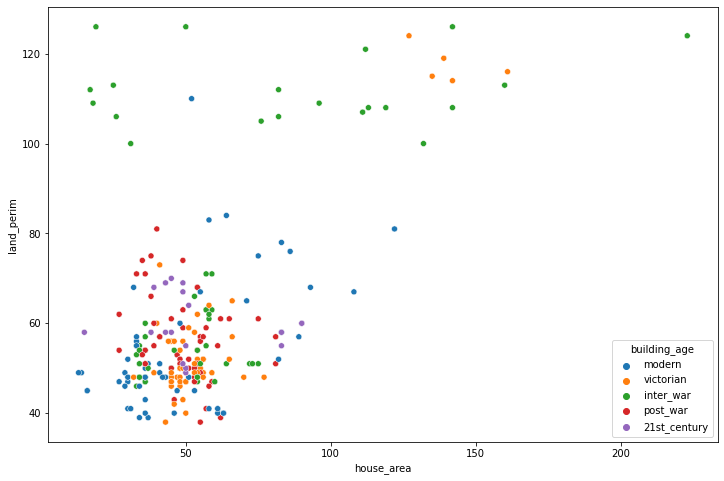

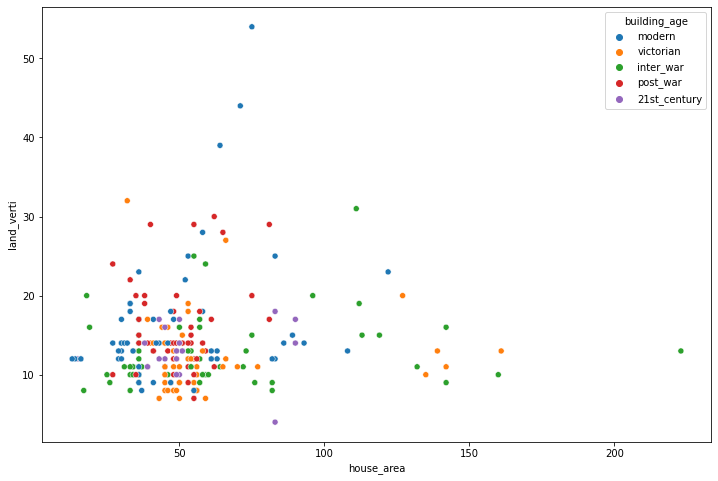

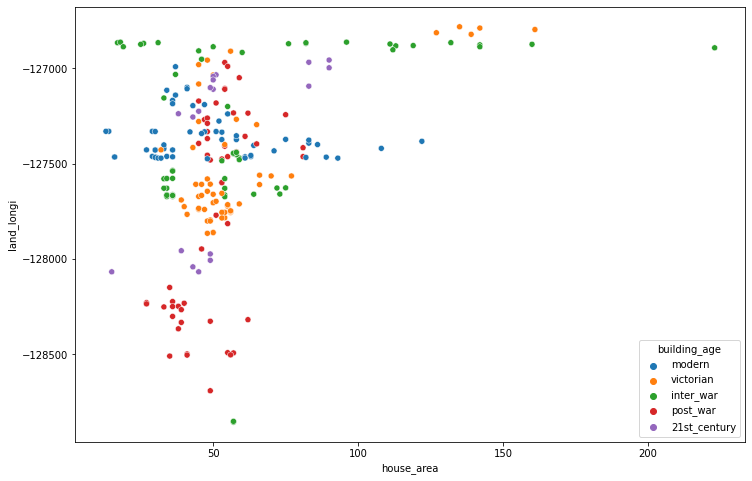

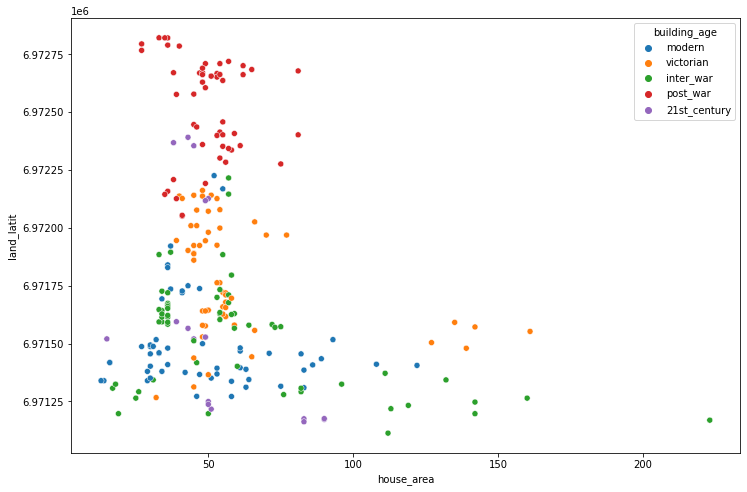

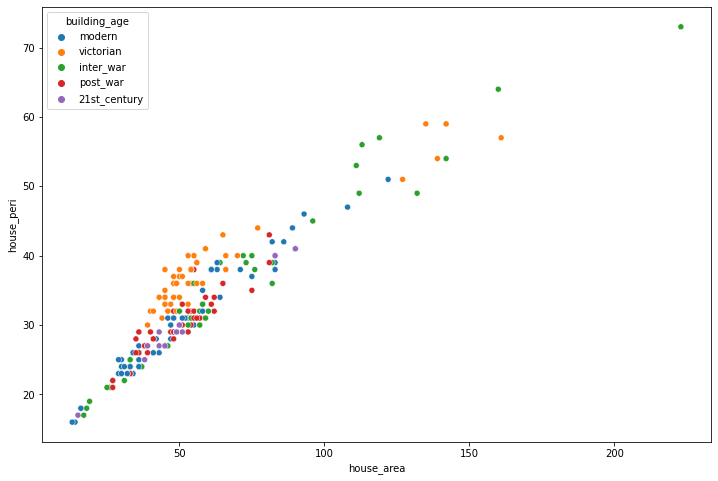

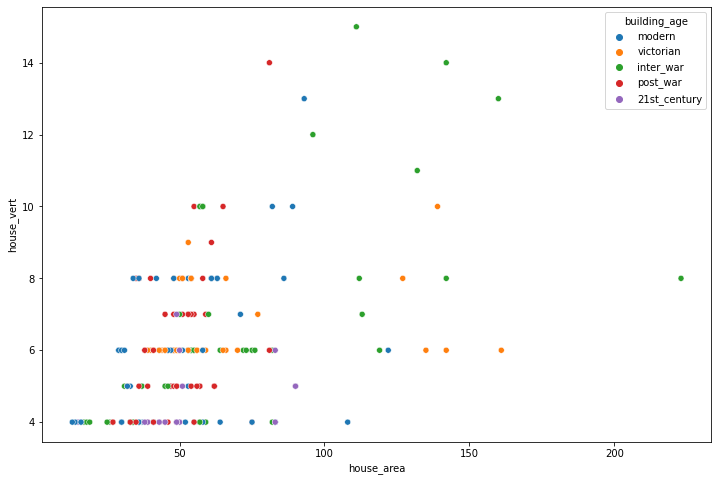

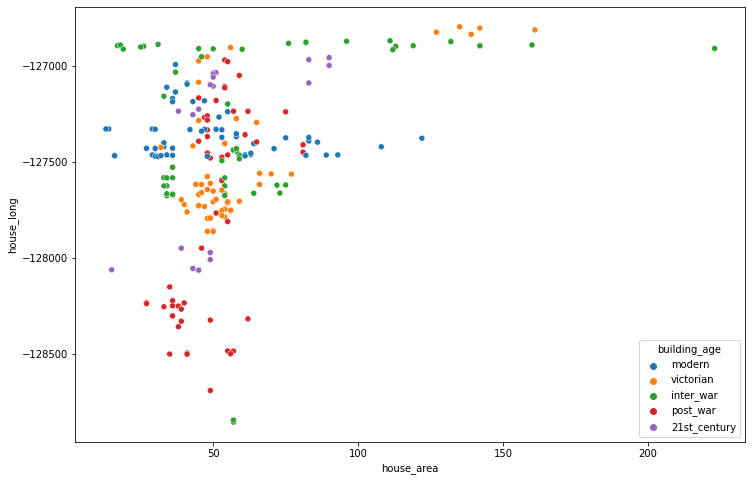

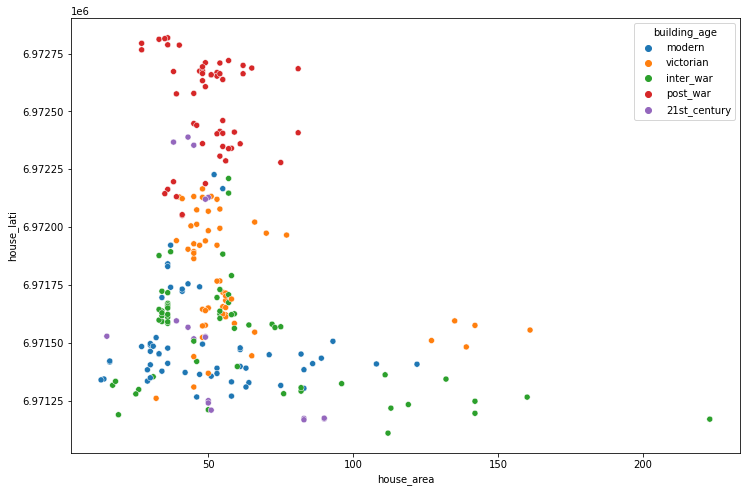

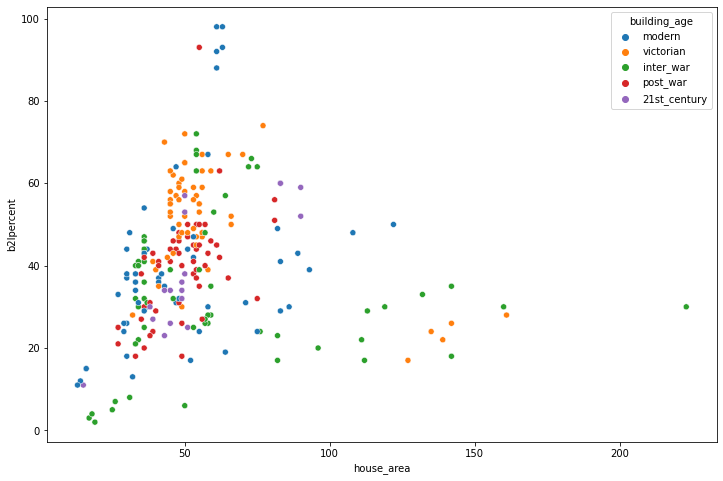

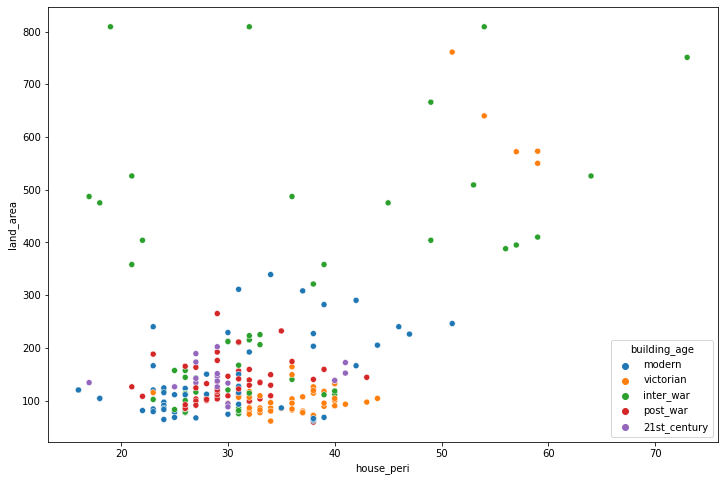

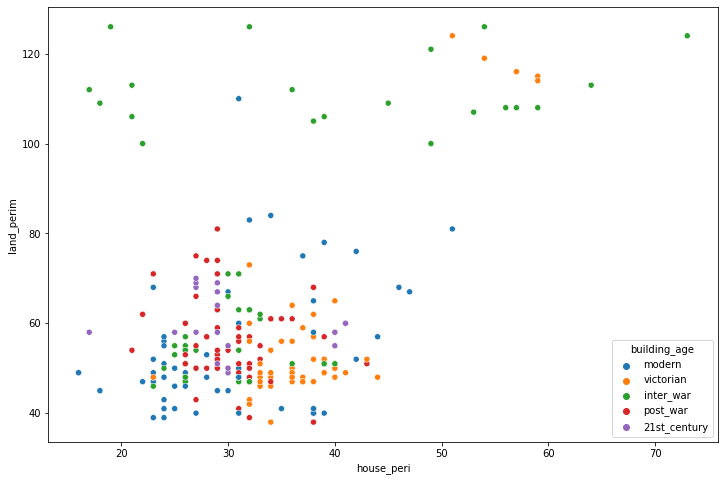

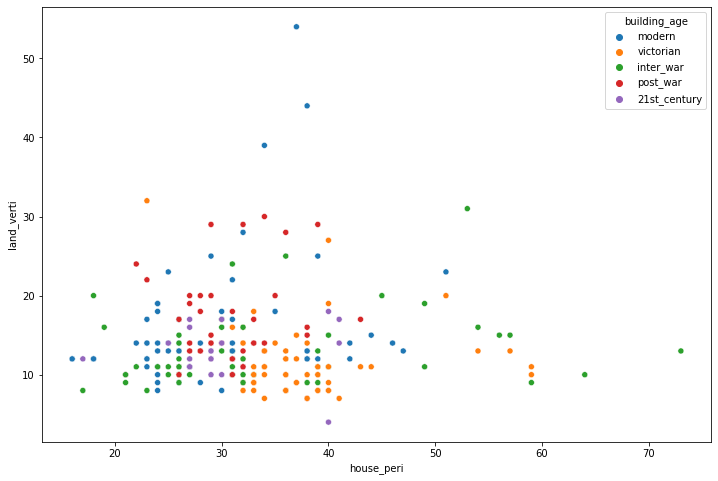

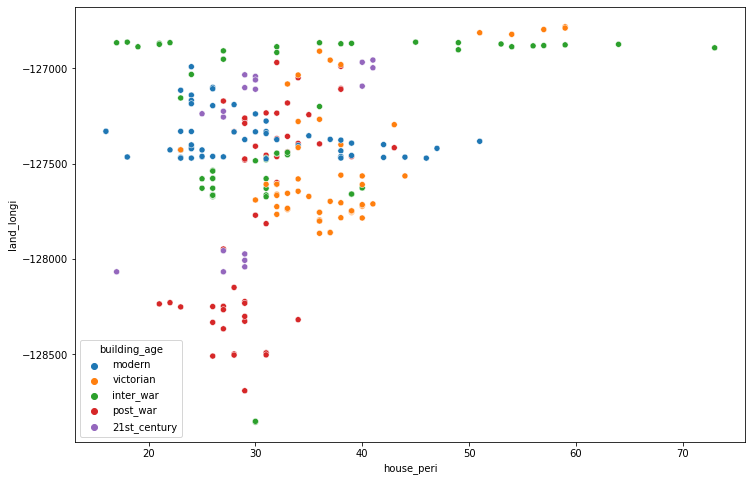

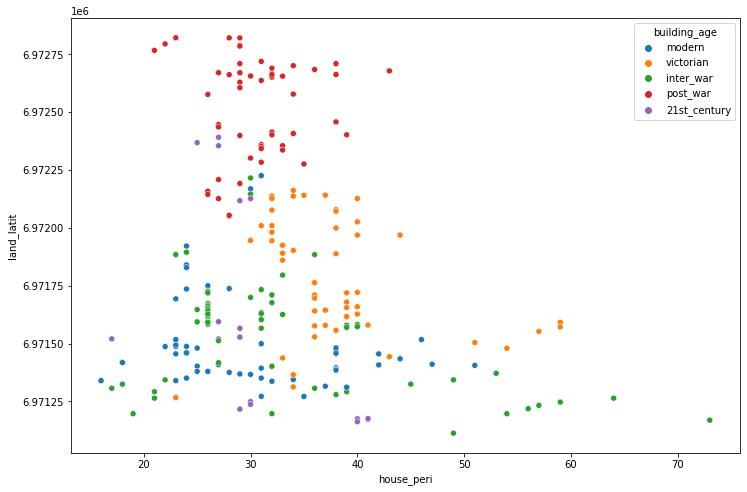

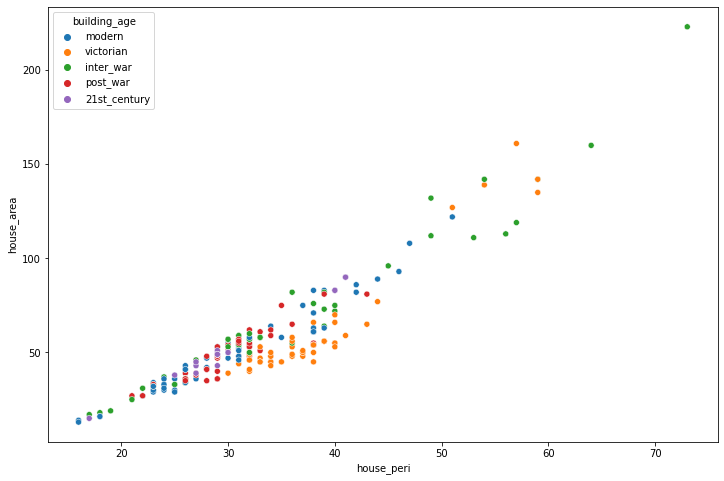

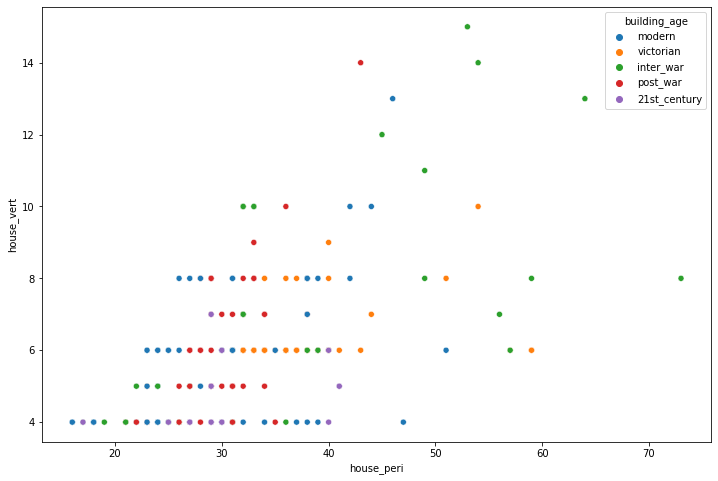

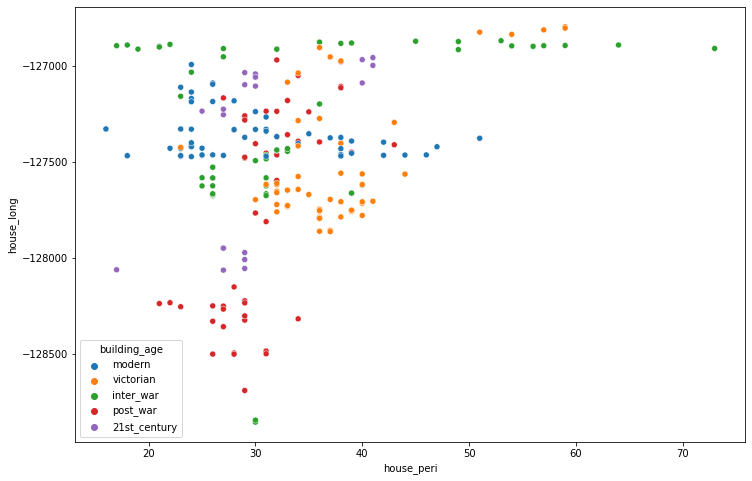

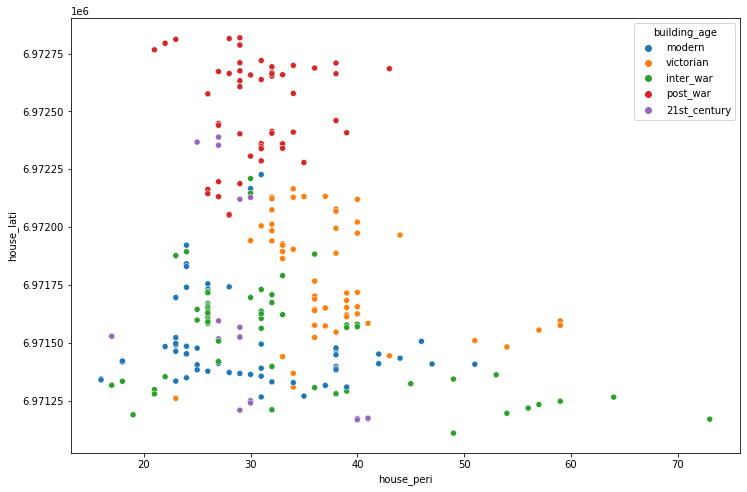

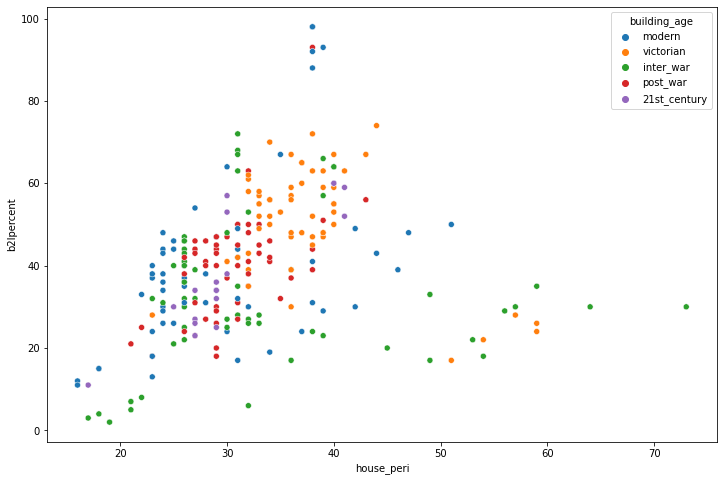

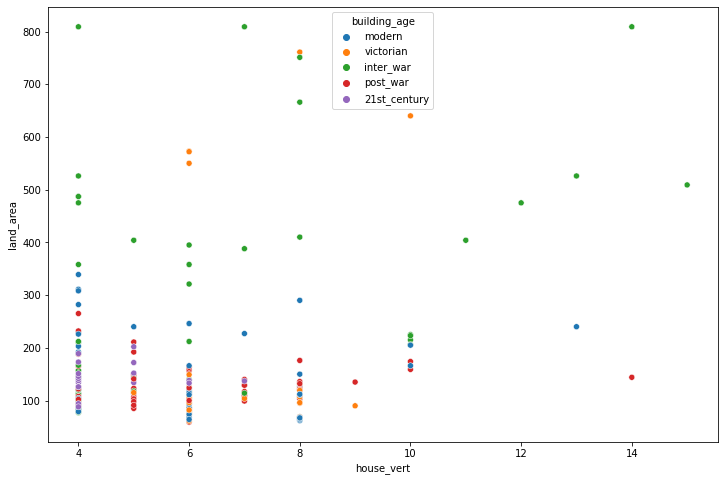

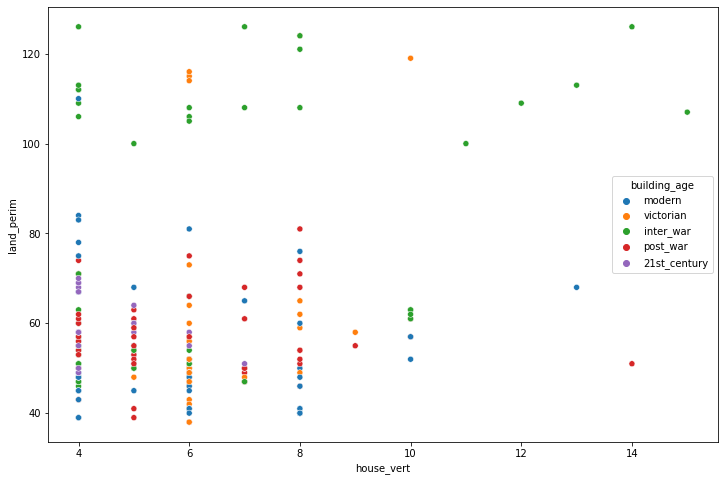

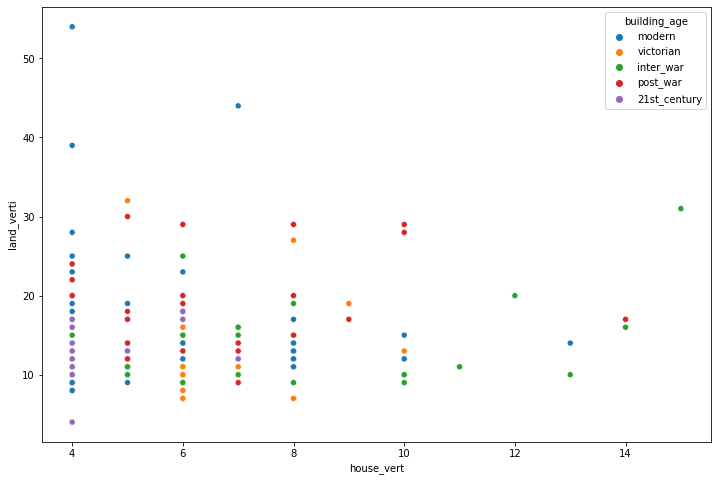

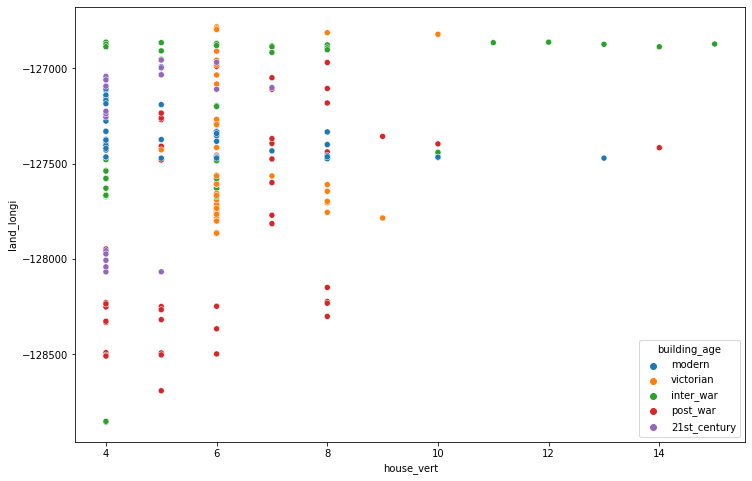

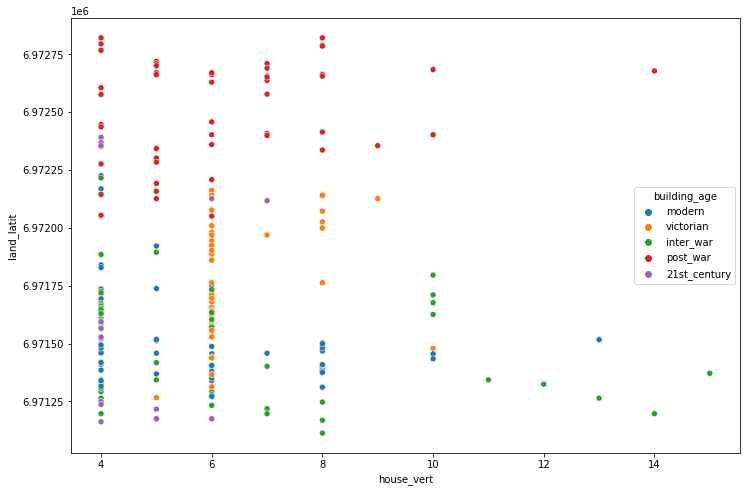

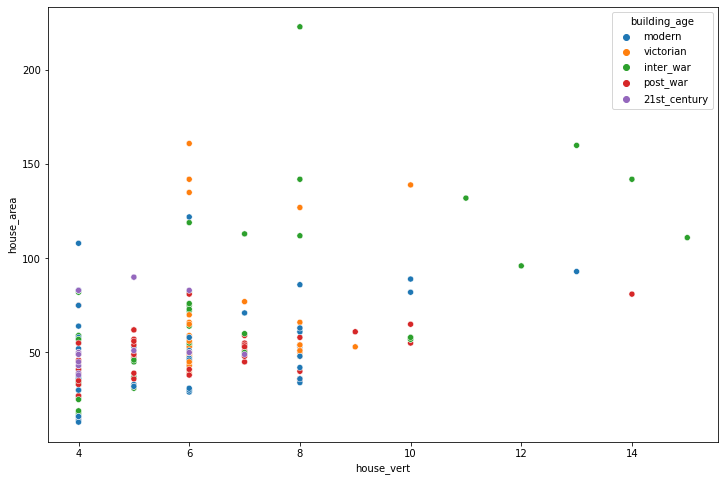

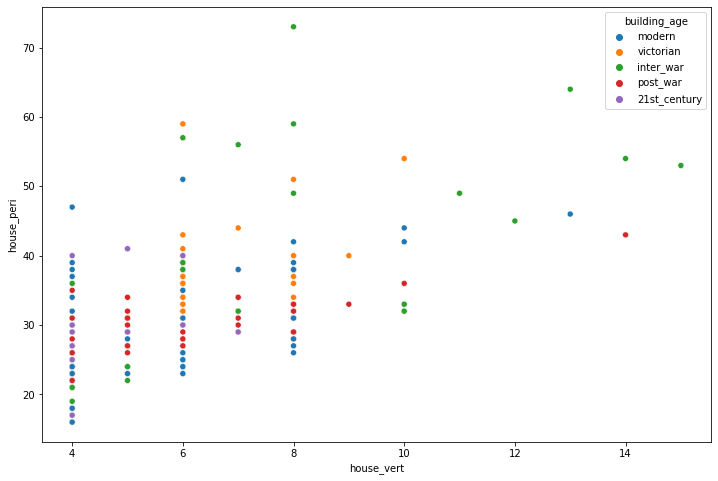

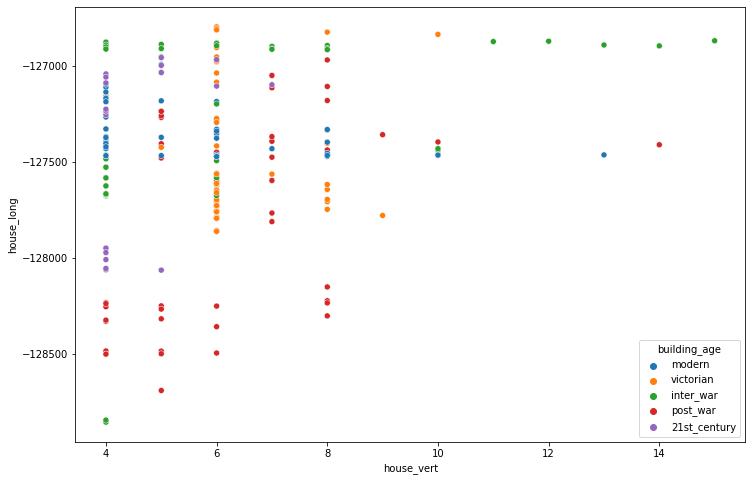

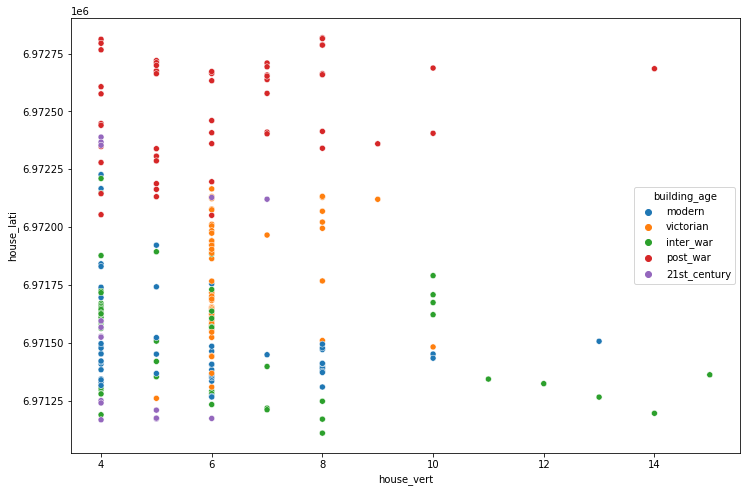

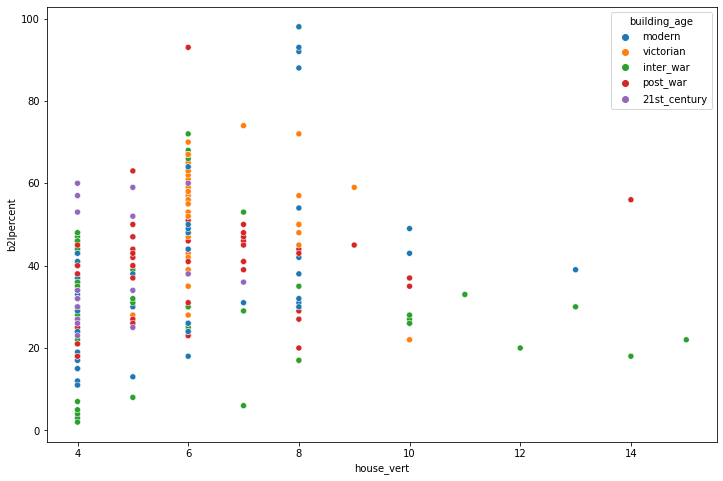

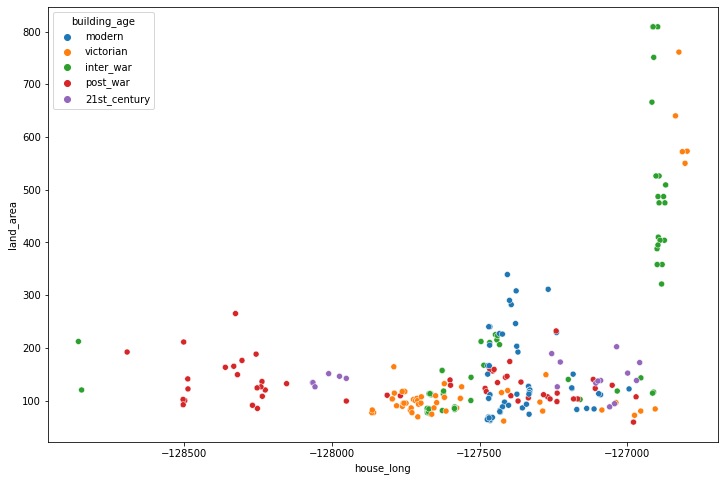

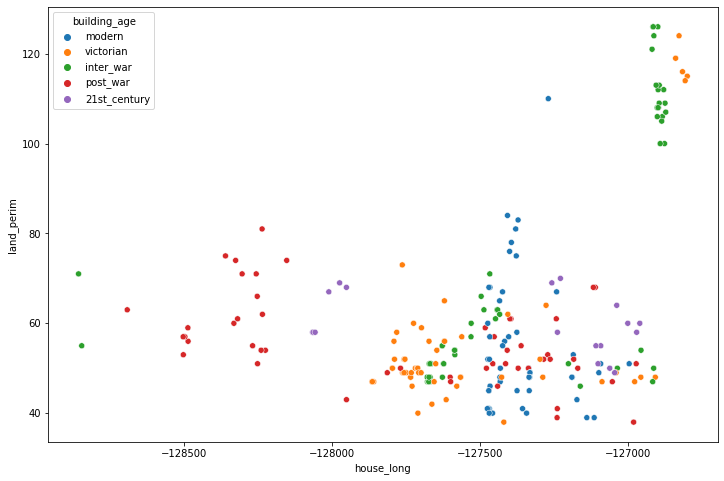

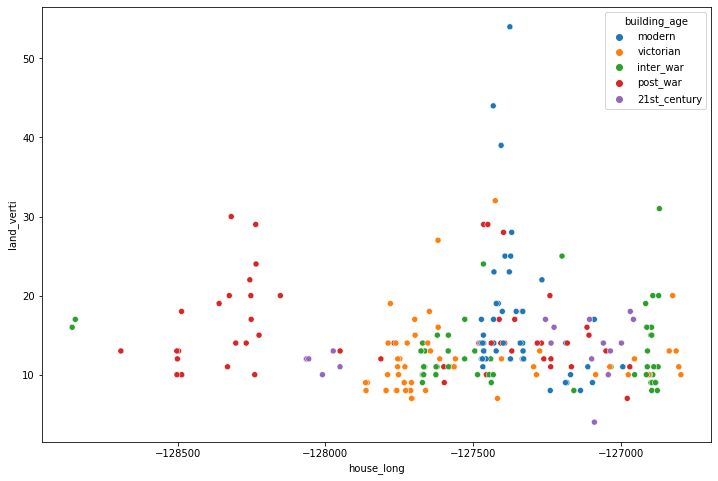

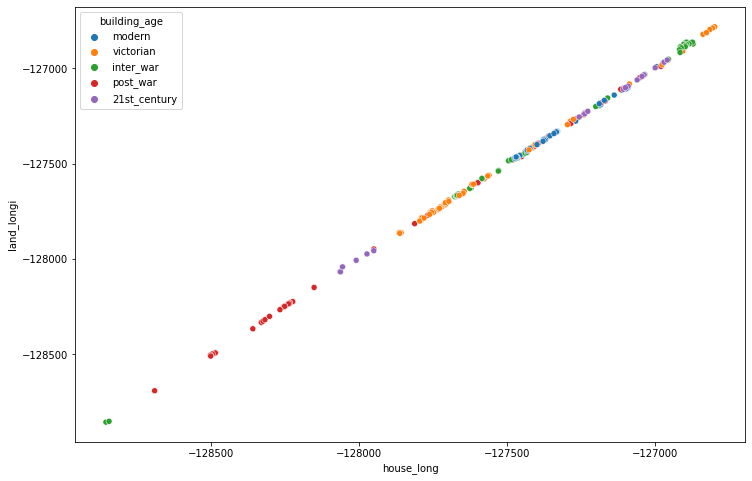

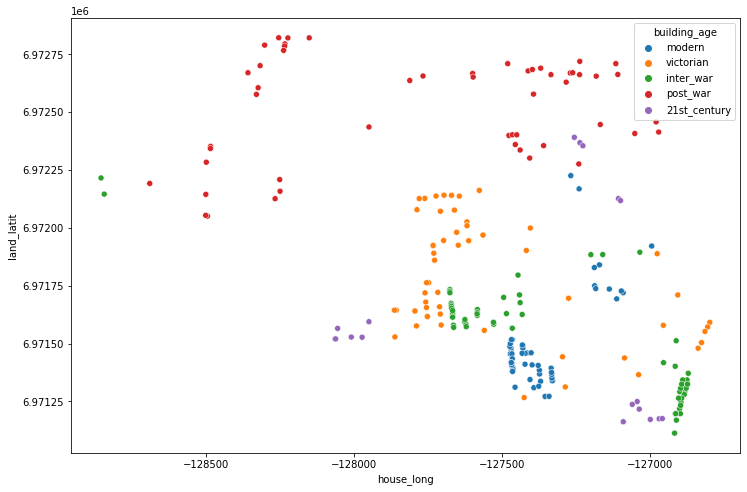

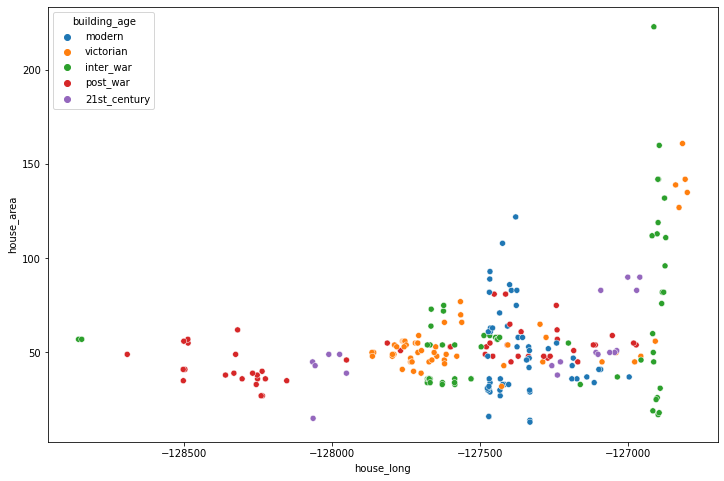

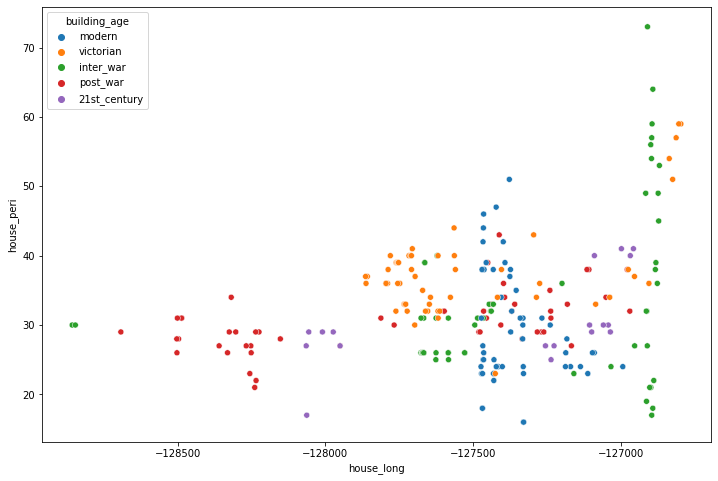

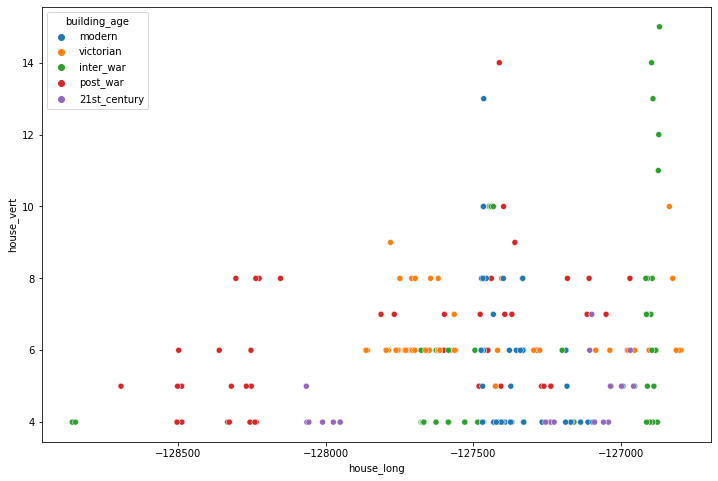

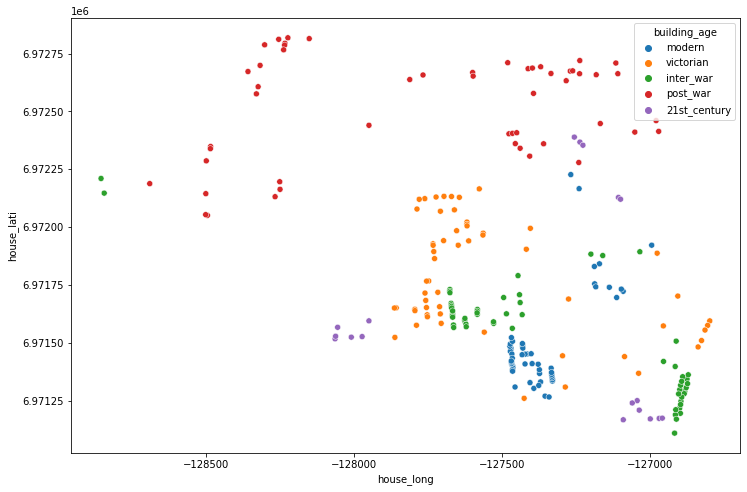

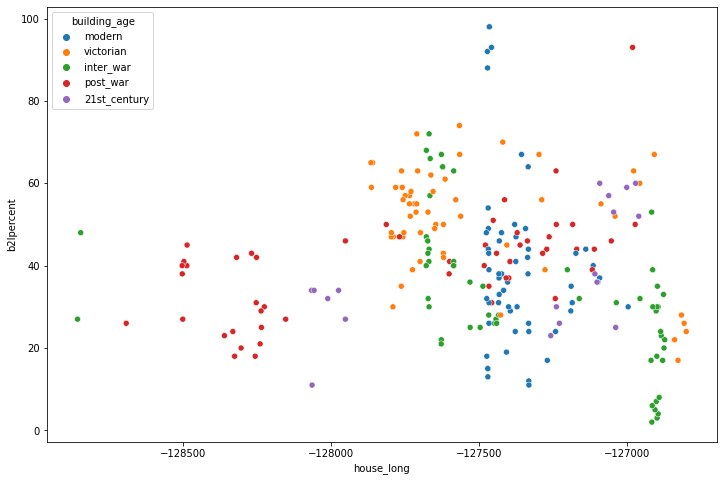

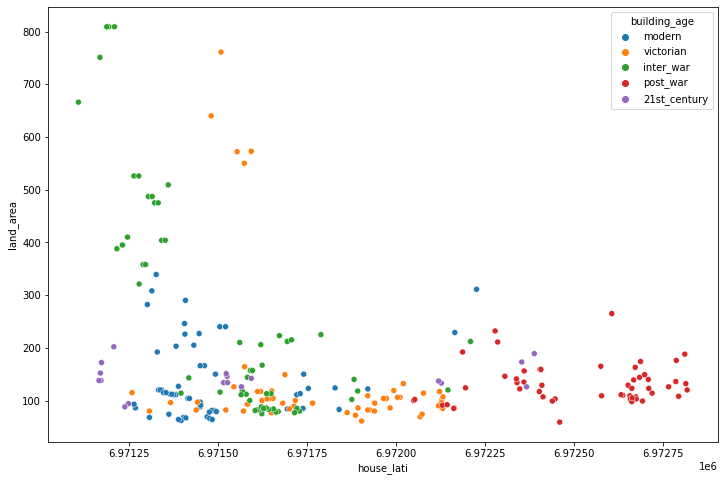

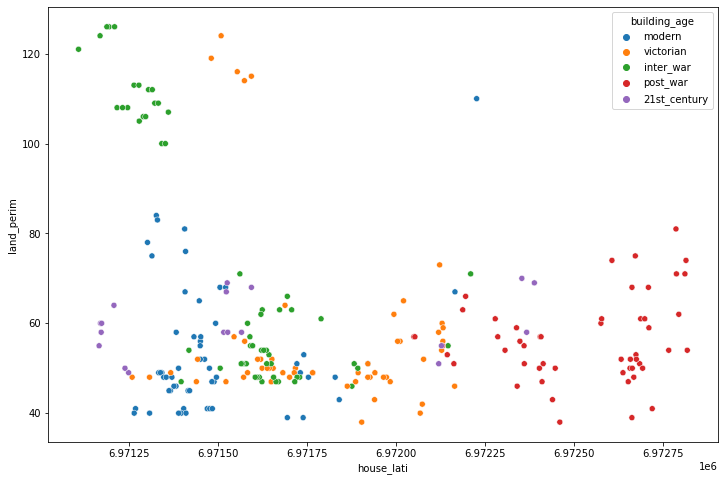

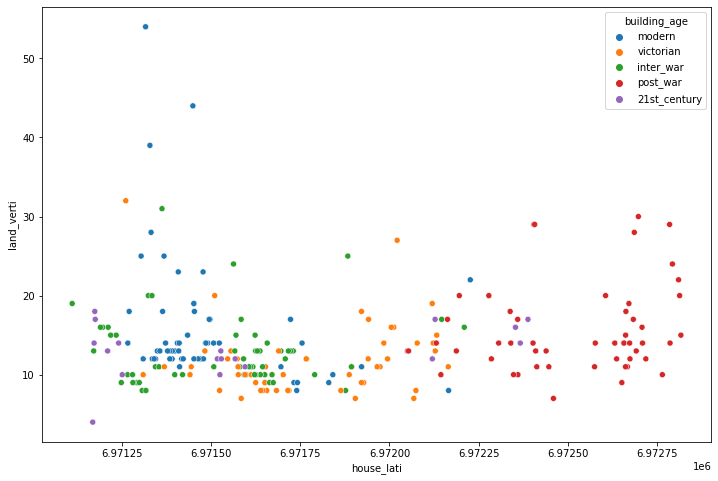

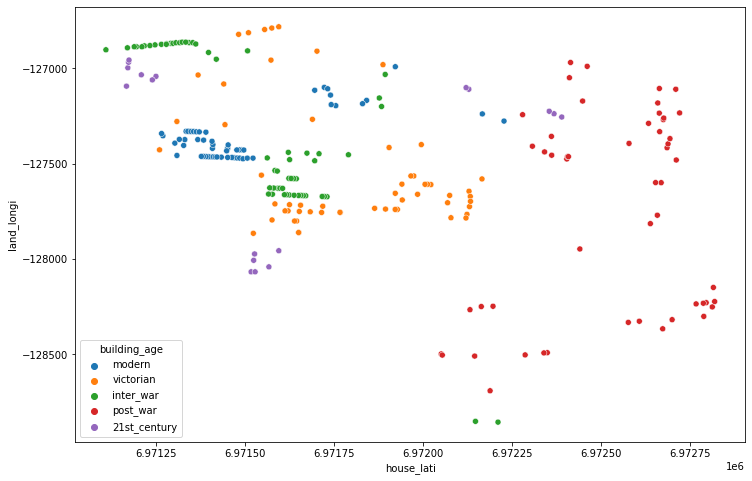

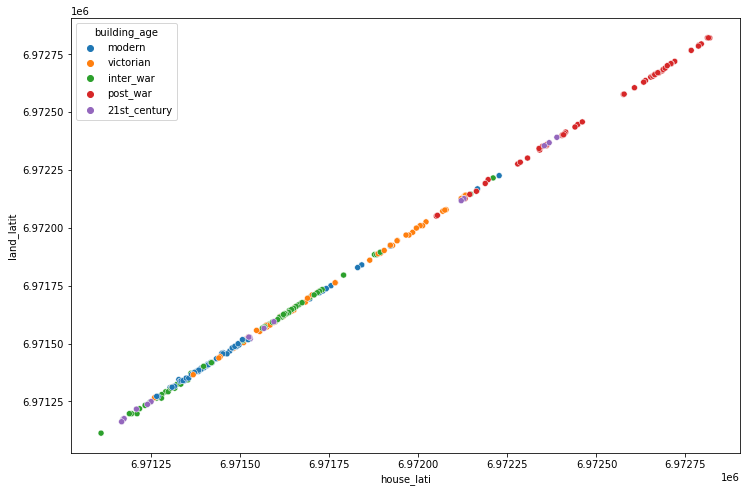

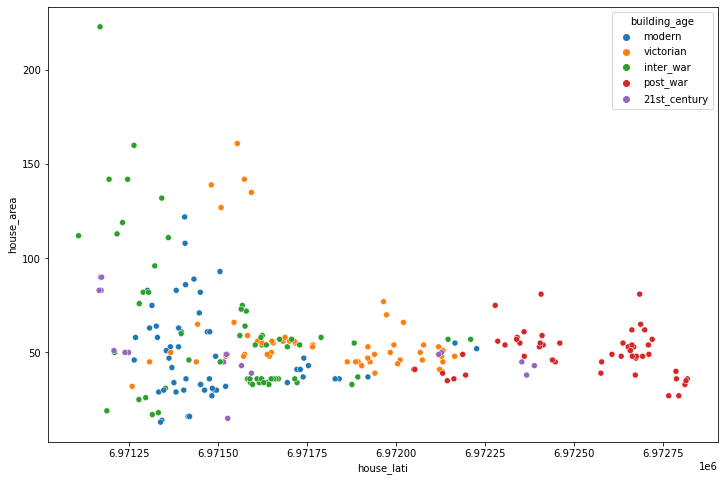

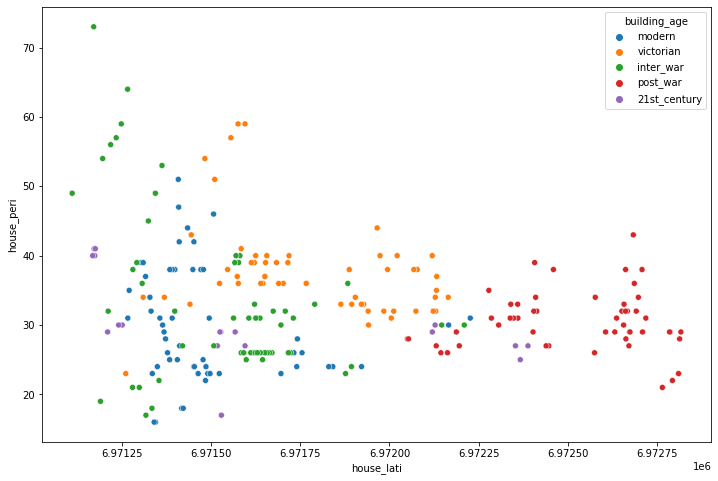

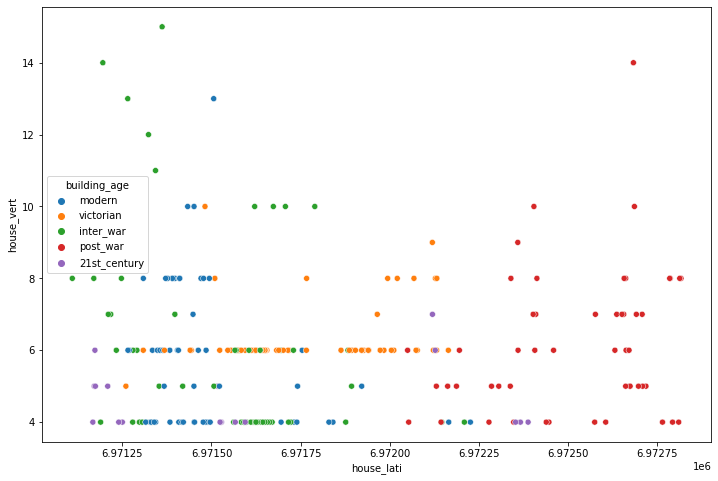

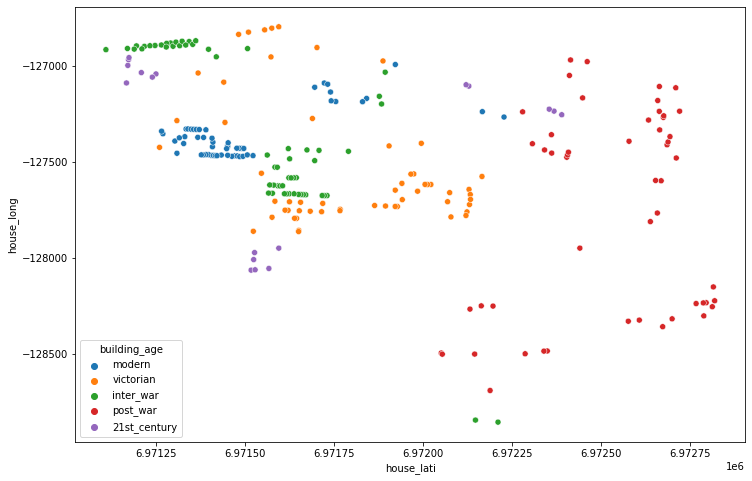

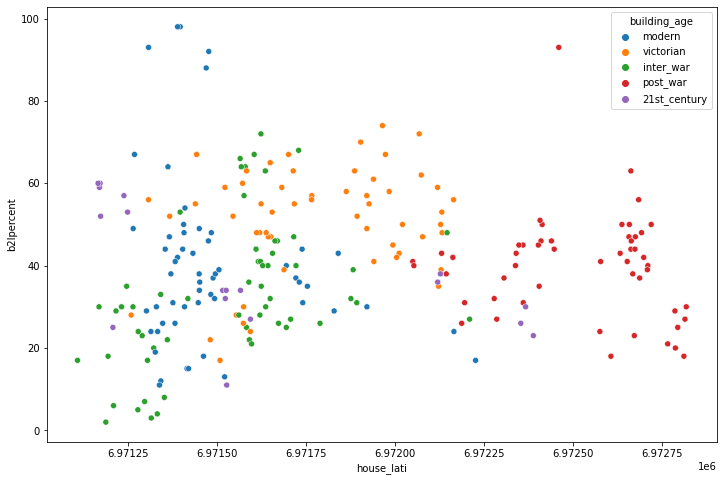

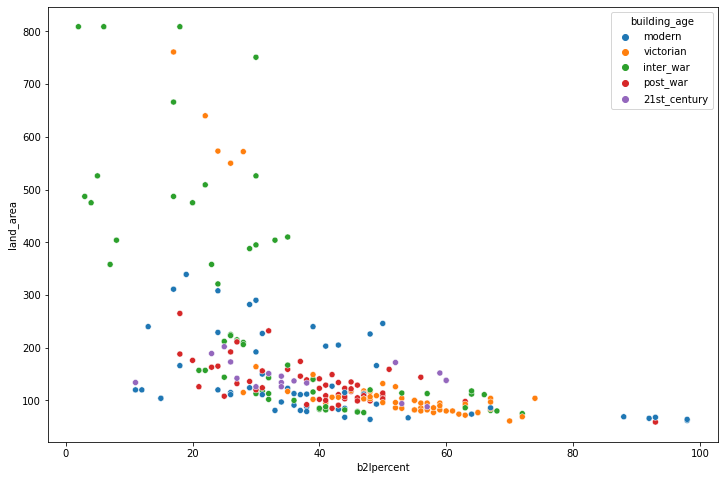

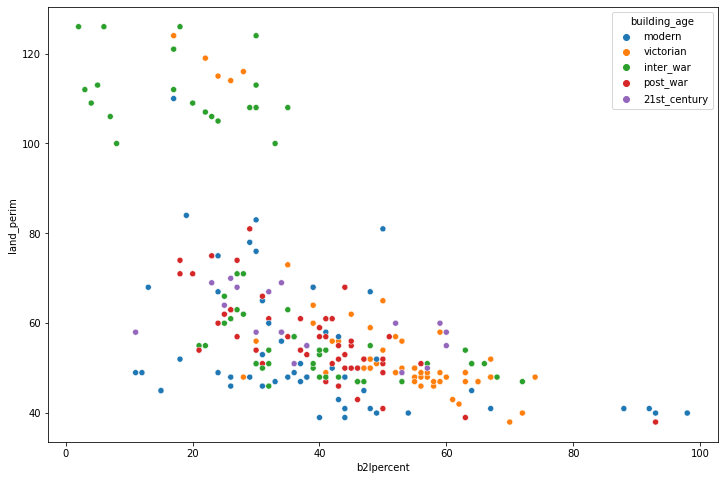

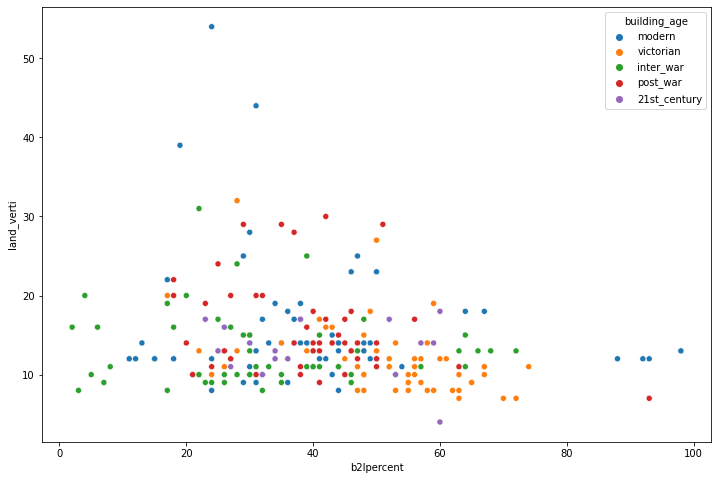

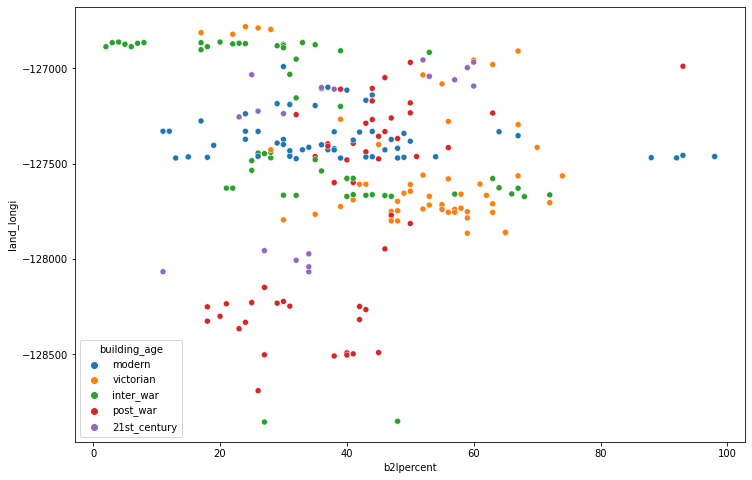

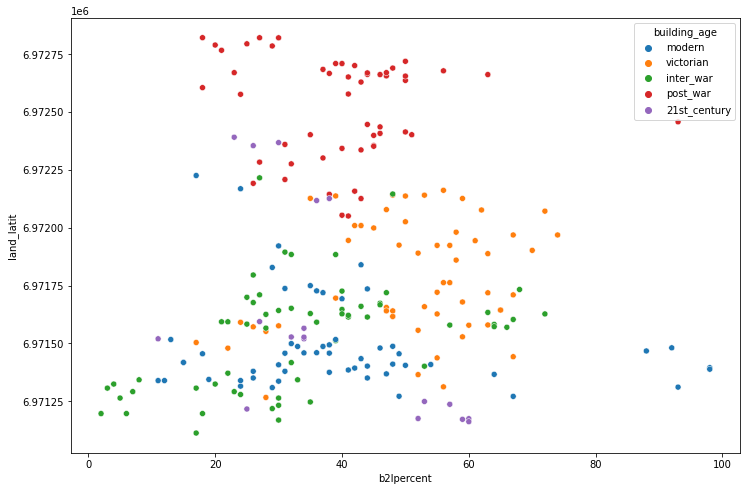

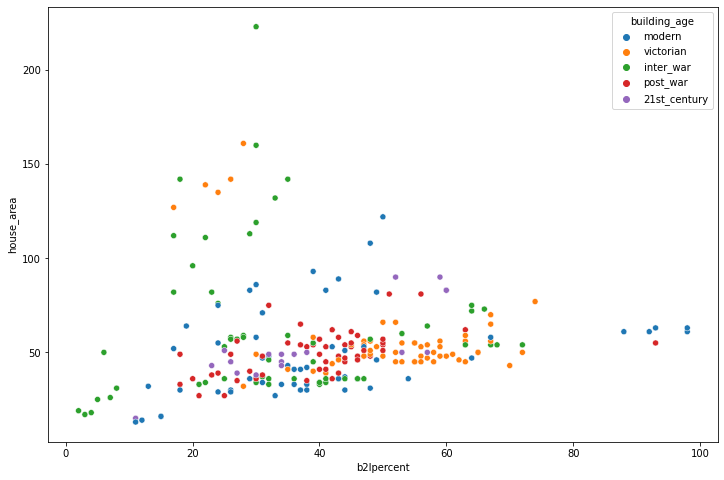

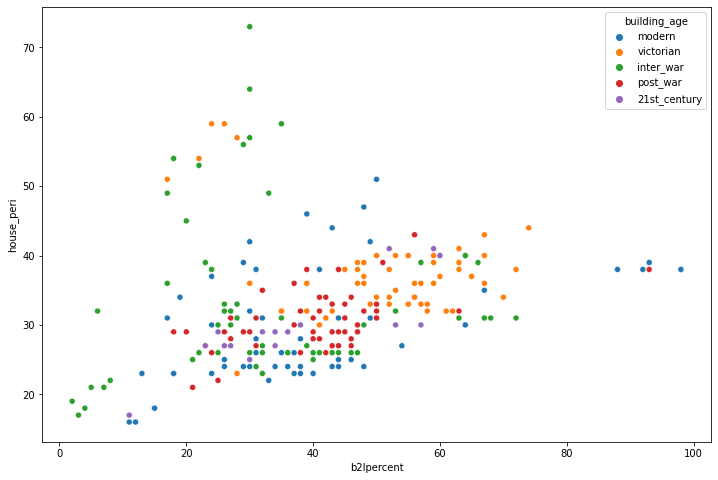

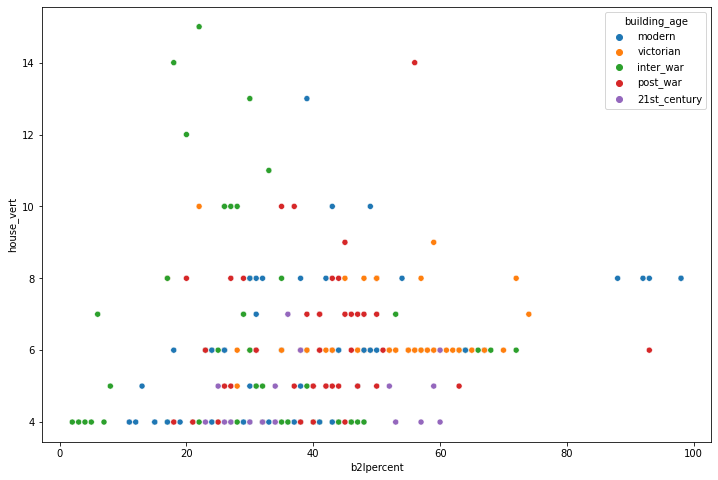

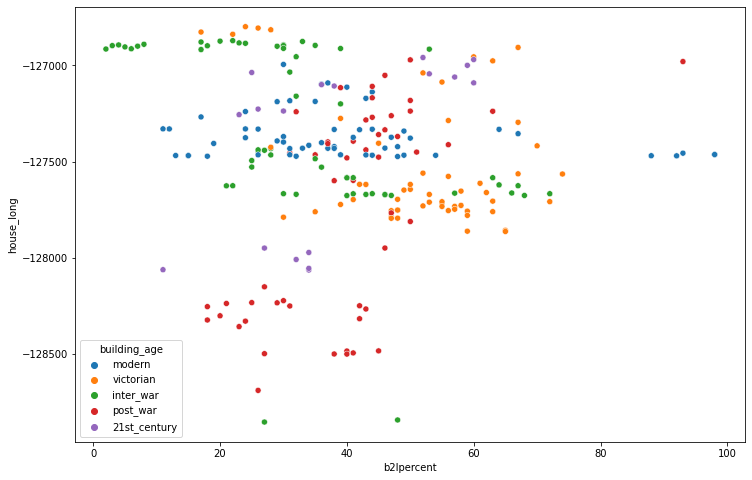

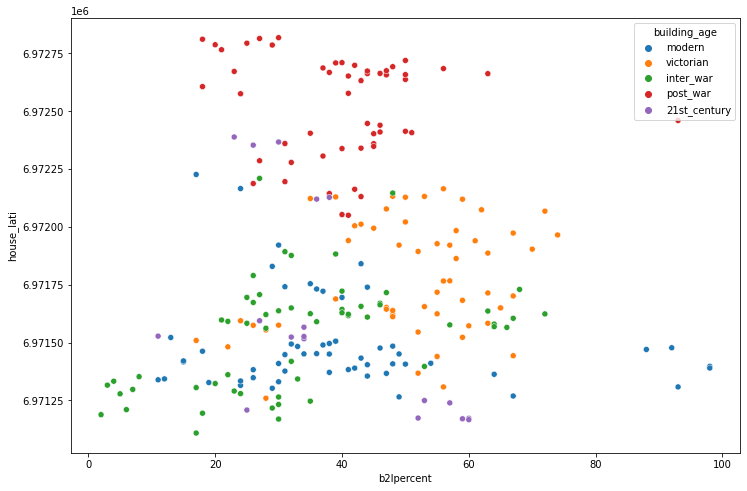

In [178]:
# List of features
#features = ['land_area', 'land_perim', 'land_verti', 'land_longi', 'land_latit',
#            'osm_way_id', 'house_area', 'house_peri',
#            'house_vert', 'house_long', 'house_lati', 'b2lpercent']
features = ['land_area', 'land_perim', 'land_verti', 'land_longi', 'land_latit', 'house_area', 'house_peri',
            'house_vert', 'house_long', 'house_lati', 'b2lpercent']

# Assuming `labelled_data` is your DataFrame
for feature in features:
    for feature2 in features:
        if feature != feature2:
            plt.figure(figsize=(12, 8))
            sns.scatterplot(x=feature, y=feature2, hue='building_age', data=labelled_data)
            plt.savefig('plots/'+feature+'_'+feature2+'_280.png')
            plt.show()

### Preparing features for training model

# Prerequistites

In [179]:
!pip install scikit-learn xgboost

# 1. Data Preparation


In [180]:
# encoding building_age
encoder = LabelEncoder()
labelled_data['building_age_encoded'] = encoder.fit_transform(labelled_data['building_age'])

/var/folders/jf/_h21nlf54hq6220nzhj98l7h0000gn/T/ipykernel_20070/3001555895.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labelled_data['building_age_encoded'] = encoder.fit_transform(labelled_data['building_age'])


In [181]:
X = labelled_data[features]
y = labelled_data['building_age_encoded']  # Use the encoded column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Changed to classifiers

In [182]:
lr_classifier = LogisticRegression(max_iter=1000)
lr_classifier.fit(X_train, y_train)

lr_predictions = lr_classifier.predict(X_test)

lr_accuracy = accuracy_score(y_test, lr_predictions)
lr_error = 1 - lr_accuracy

print(f"Logistic Regression Accuracy: {lr_accuracy:.4f}")
print(f"Logistic Regression Error: {lr_error:.4f}")

Logistic Regression Accuracy: 0.1429
Logistic Regression Error: 0.8571


In [183]:
estimators = [
    ('rf', RandomForestClassifier()),
    ('dt', DecisionTreeClassifier()),
    ('svc', SVC())
]
stack_classifier = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stack_classifier.fit(X_train, y_train)

stack_predictions = stack_classifier.predict(X_test)

stack_accuracy = accuracy_score(y_test, stack_predictions)
stack_error = 1 - stack_accuracy

print(f"Stacked Generalization Accuracy: {stack_accuracy:.4f}")
print(f"Stacked Generalization Error: {stack_error:.4f}")

Stacked Generalization Accuracy: 0.8163
Stacked Generalization Error: 0.1837


/Users/luketaylor/anaconda3/envs/uf-ml/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [184]:
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train, y_train)

xgb_predictions = xgb_classifier.predict(X_test)

xgb_accuracy = accuracy_score(y_test, xgb_predictions)
xgb_error = 1 - xgb_accuracy

print(f"XGBoost Accuracy: {xgb_accuracy:.4f}")
print(f"XGBoost Error: {xgb_error:.4f}")

/Users/luketaylor/anaconda3/envs/uf-ml/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/luketaylor/anaconda3/envs/uf-ml/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11:40:54] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost Accuracy: 0.8163
XGBoost Error: 0.1837


In [185]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

rf_predictions = rf_classifier.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_error = 1 - rf_accuracy

print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
print(f"Random Forest Error: {rf_error:.4f}")

Random Forest Accuracy: 0.8367
Random Forest Error: 0.1633


In [186]:
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

dt_predictions = dt_classifier.predict(X_test)

dt_accuracy = accuracy_score(y_test, dt_predictions)
dt_error = 1 - dt_accuracy

print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")
print(f"Decision Tree Error: {dt_error:.4f}")

Decision Tree Accuracy: 0.7551
Decision Tree Error: 0.2449


In [187]:
## predict all unknown data
unknown = data[features]
prediction_num = rf_classifier.predict(unknown)
unknown['predicted_buiding_age'] = encoder.inverse_transform(prediction_num)

/var/folders/jf/_h21nlf54hq6220nzhj98l7h0000gn/T/ipykernel_20070/2267656423.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unknown['predicted_buiding_age'] = encoder.inverse_transform(prediction_num)


In [188]:
unknown

land_area  land_perim  land_verti   land_longi    land_latit  \
0         207.0        62.0        12.0 -128367.6972  6.971752e+06   
1        1261.0       151.0        36.0 -127157.2719  6.972083e+06   
2        1261.0       151.0        36.0 -127157.2719  6.972083e+06   
3        1261.0       151.0        36.0 -127157.2719  6.972083e+06   
4        1261.0       151.0        36.0 -127157.2719  6.972083e+06   
...         ...         ...         ...          ...           ...   
2575      249.0        68.0        11.0 -126524.4317  6.972113e+06   
2576      249.0        68.0        11.0 -126524.4317  6.972113e+06   
2577      160.0        71.0        11.0 -126531.5937  6.972125e+06   
2578      161.0        72.0         9.0 -126538.1983  6.972131e+06   
2579      157.0        67.0        14.0 -126511.7250  6.972107e+06   

      house_area  house_peri  house_vert  house_long    house_lati  \
0             66          34           8  -128372.04  6.971754e+06   
1             70          34           4  -127167.64  6.972089e+06   
2             65          32           4  -127182.76  6.972106e+06   
3             78          36           4  -127142.03  6.972057e+06   
4             70          34           4  -127157.89  6.972077e+06   
...          ...         ...         ...         ...           ...   
2575          51          30           4  -126517.78  6.972124e+06   
2576          57          31           4  -126511.29  6.972118e+06   
2577          52          30           4  -126523.83  6.972130e+06   
2578          50          30           4  -126529.85  6.972136e+06   
2579          51          30           4  -126504.83  6.972112e+06   

      b2lpercent predicted_buiding_age  
0           32.0             victorian  
1            6.0             victorian  
2            5.0                modern  
3            6.0             victorian  
4            6.0             victorian  
...          ...                   ...  
2575        20.0             victorian  
2576        23.0             victorian  
2577        33.0             victorian  
2578        31.0             victorian  
2579        32.0             victorian  

[2580 rows x 12 columns]

In [189]:
unknown.to_csv('../5_predictions/meadows_with_predictions.csv', index=None)

### Visualising random forest output

/Users/luketaylor/anaconda3/envs/uf-ml/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/luketaylor/anaconda3/envs/uf-ml/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/luketaylor/anaconda3/envs/uf-ml/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/luketaylor/anaconda3/envs/uf-ml/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/luketaylor/anaconda3/envs/uf-ml/l

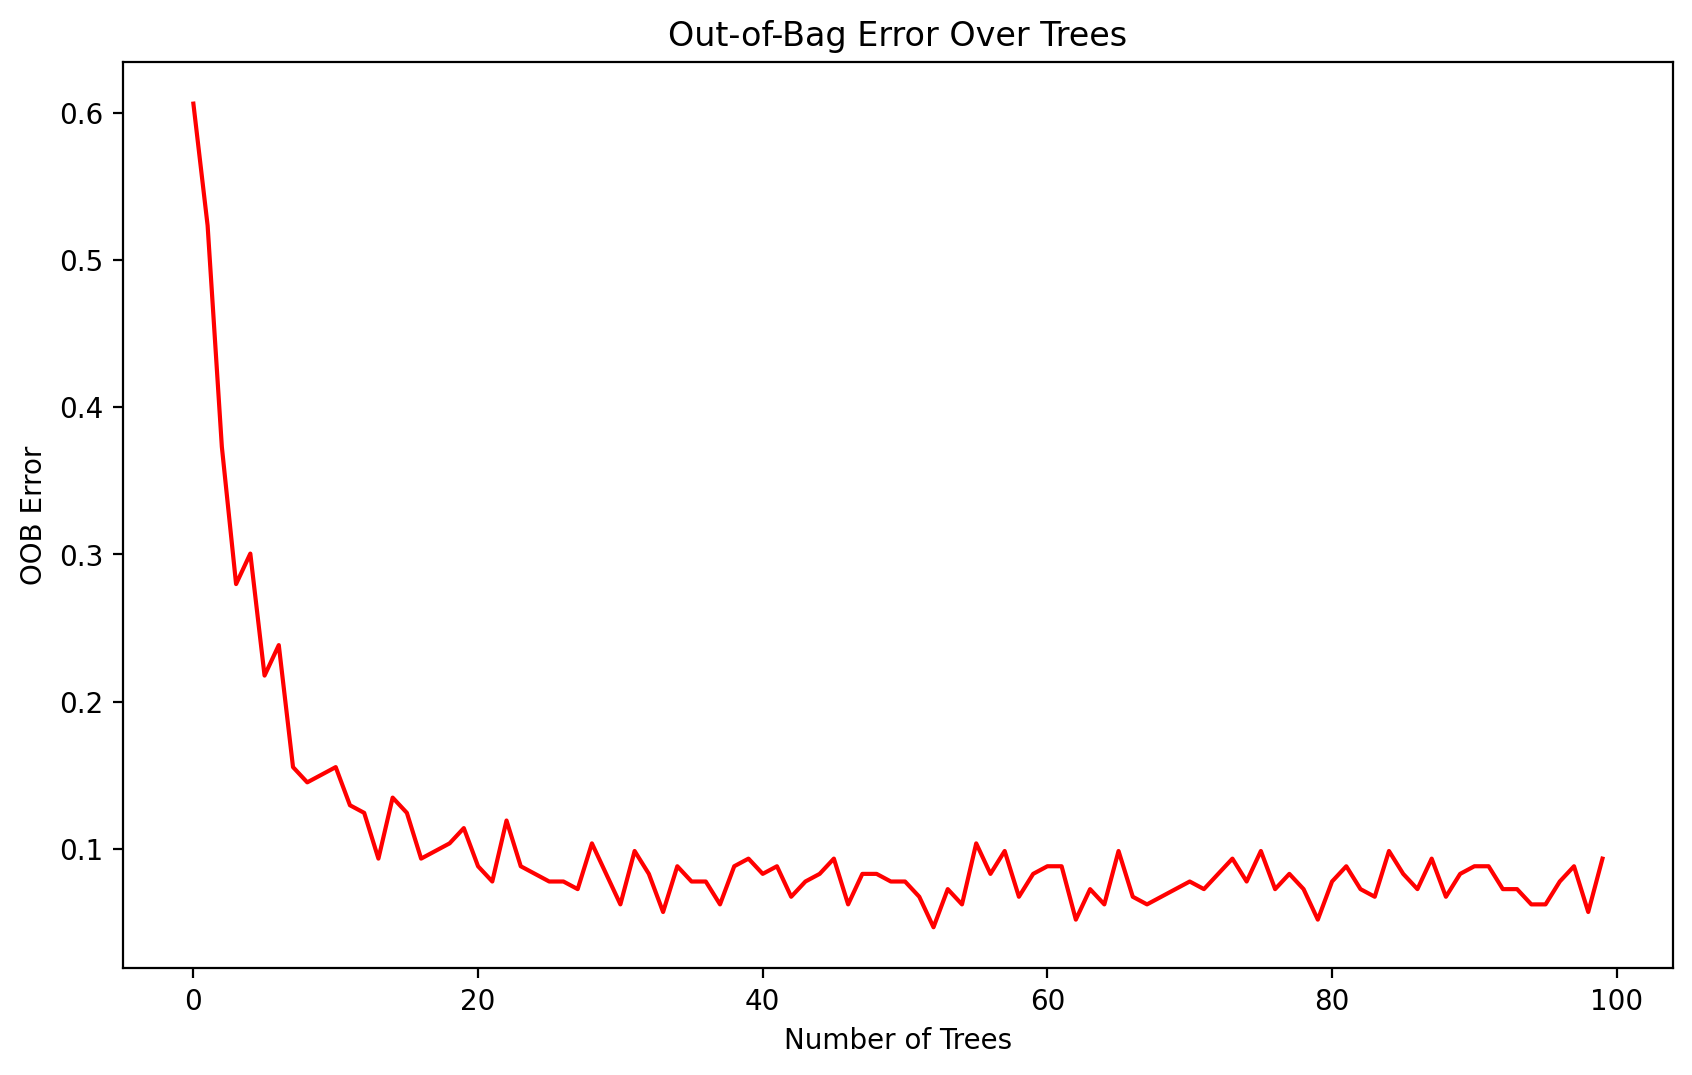

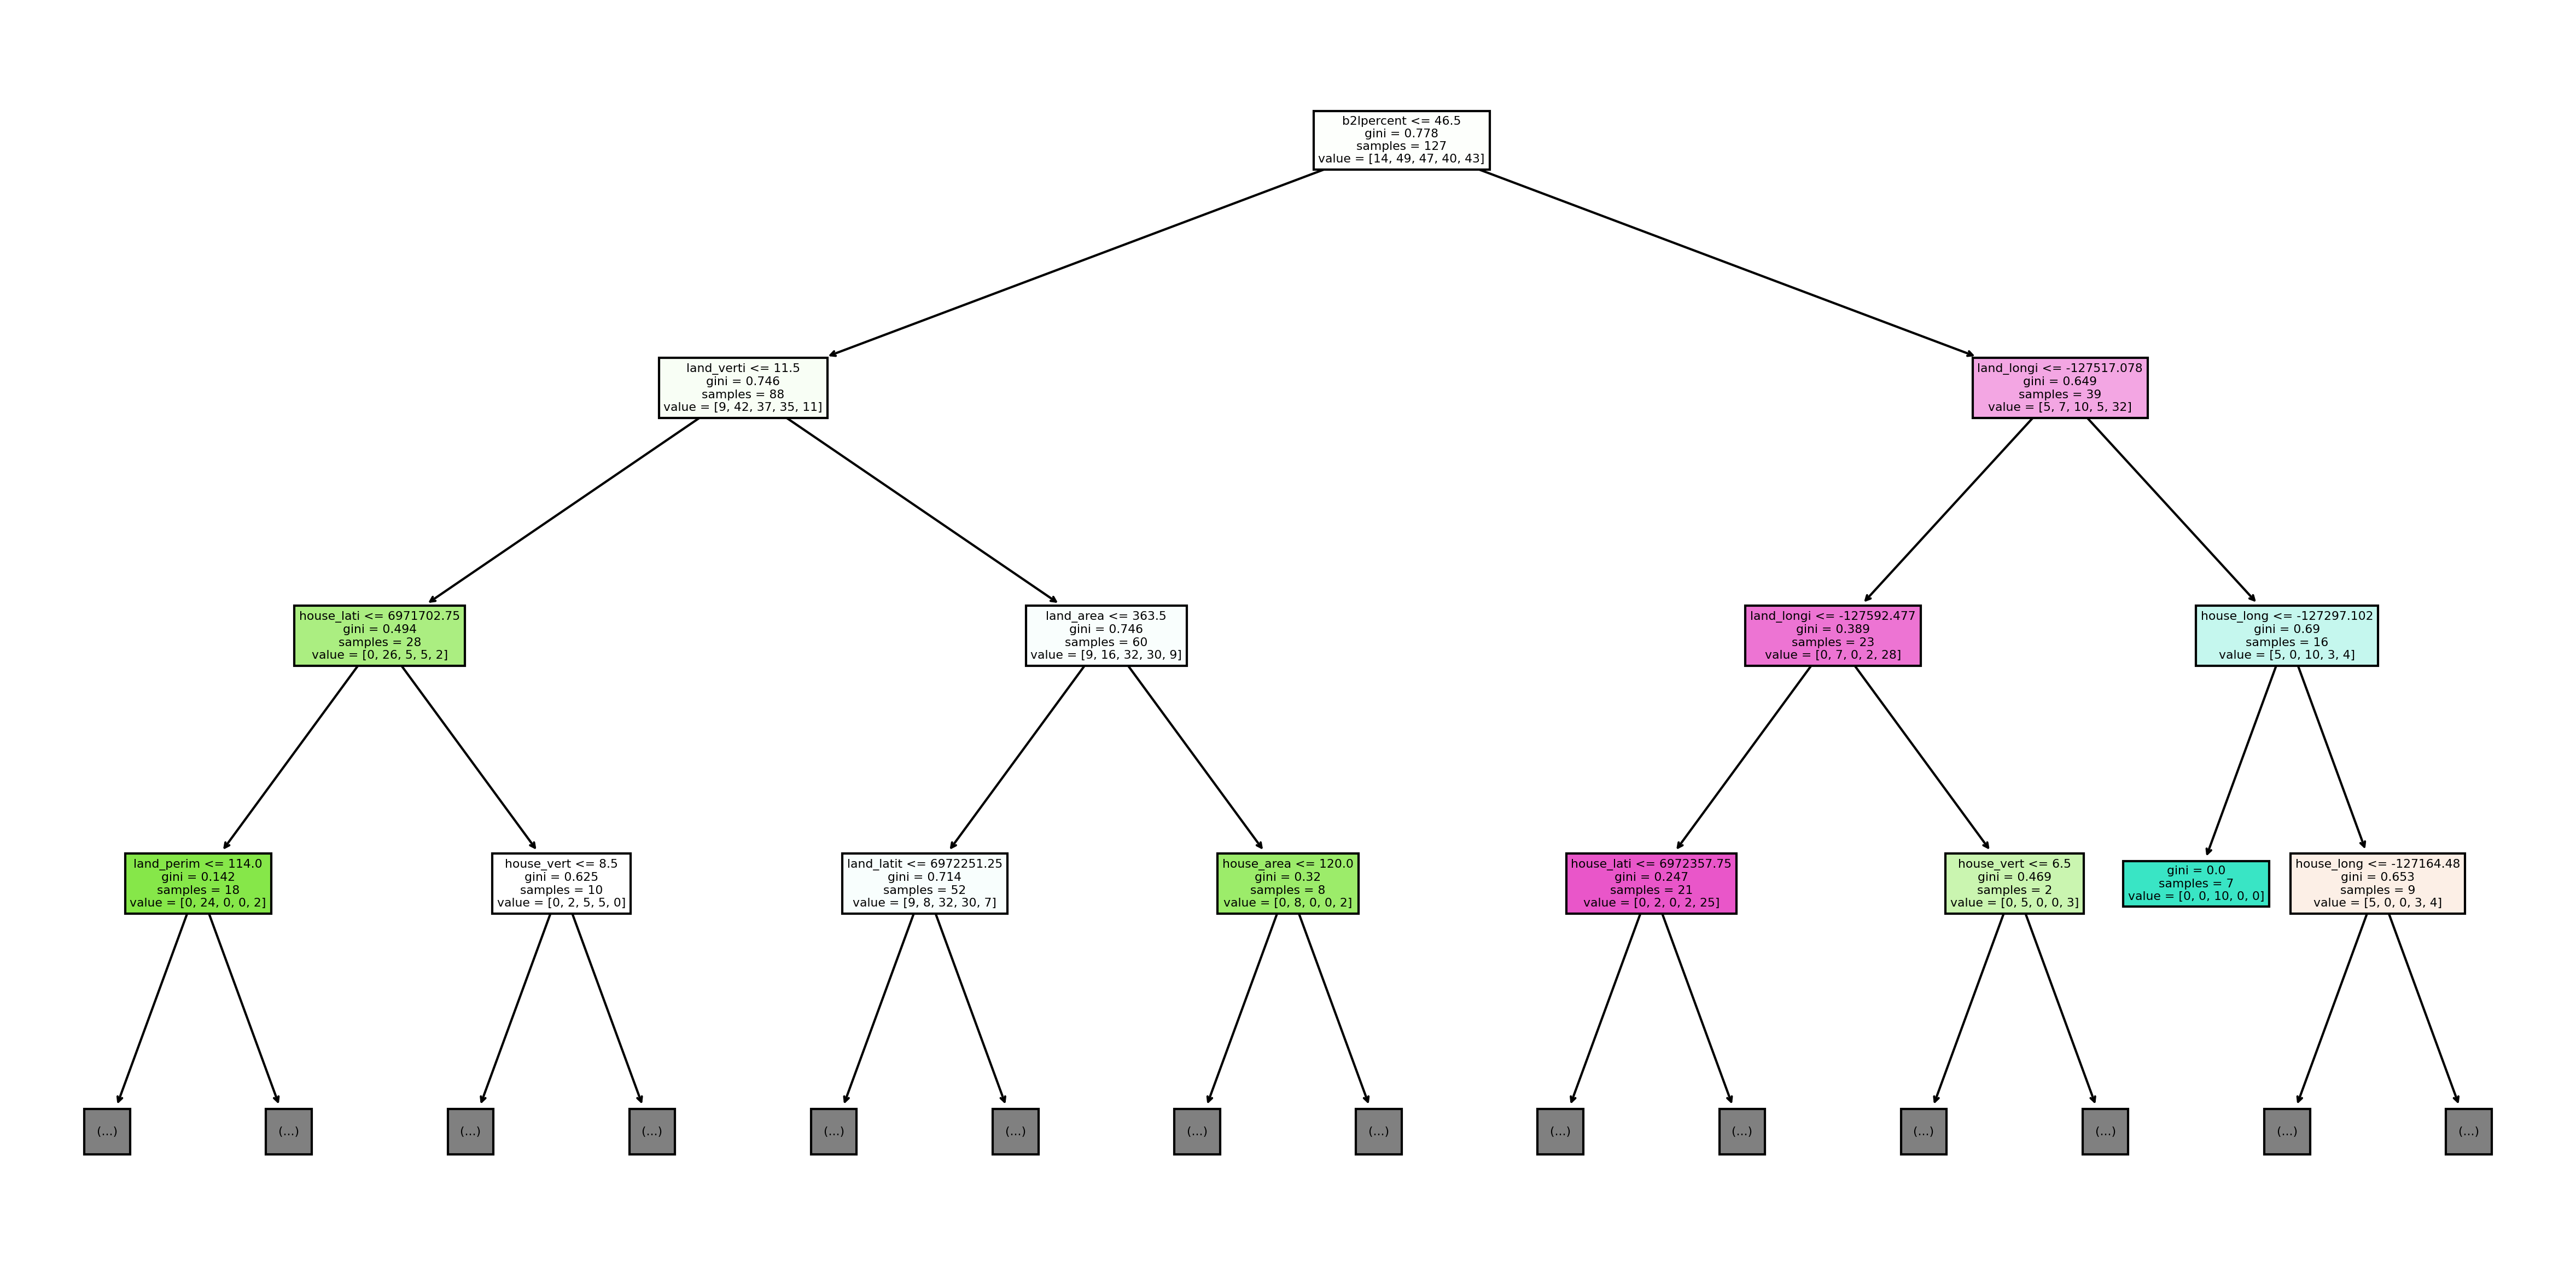

In [190]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
# convergence

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Initialize a Random Forest with out-of-bag samples enabled
rf_classifier = RandomForestClassifier(oob_score=True, n_estimators=100)
errors = []

# Fit the model and collect OOB errors after adding each tree
for i in range(1, 101):  # Assuming 100 trees in the forest
    rf_classifier.set_params(n_estimators=i)
    rf_classifier.fit(X_train, y_train)
    oob_error = 1 - rf_classifier.oob_score_
    errors.append(oob_error)

# Plot the OOB error
plt.figure(figsize=(10, 6),dpi=200)
plt.plot(errors, '-r')
plt.title('Out-of-Bag Error Over Trees')
plt.xlabel('Number of Trees')
plt.ylabel('OOB Error')
plt.show()

# To visualize an individual tree
chosen_tree = rf_classifier.estimators_[0]  # Pick the first tree as an example
plt.figure(figsize=(20, 10),dpi=300)
plot_tree(chosen_tree, filled=True, feature_names=X_train.columns, max_depth=3)
plt.show()

In [191]:
# Initialize and train your Random Forest
rf_classifier = RandomForestClassifier(oob_score=True, n_estimators=100)
rf_classifier.fit(X_train, y_train)

# Choose an individual tree. For example, the first tree.
chosen_tree = rf_classifier.estimators_[0]

# Plot the entire tree. This might produce a very large and dense plot.
plt.figure(figsize=(20, 20), dpi=600)  # You might need to adjust the figure size to fit the tree.
plot_tree(chosen_tree, filled=True, feature_names=X_train.columns, class_names=True, rounded=True)

# view in high resolution
plt.savefig('tree_visualization.png', dpi=600)  # saves with a higher resolution
plt.show()

# Comparison of all models

In [193]:
# Train Models and Collect Metrics:

def get_metrics(y_true, y_pred):
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    accuracy = accuracy_score(y_true, y_pred)
    avg_f1 = f1_score(y_true, y_pred, average='macro')

    return precision, recall, f1, accuracy, avg_f1


In [194]:
# Define, train models, and collect metrics:

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Stacking Classifier": StackingClassifier(estimators=[('rf', RandomForestClassifier()), ('dt', DecisionTreeClassifier())], final_estimator=LogisticRegression()),
    "XGBoost": xgb.XGBClassifier(),
    "Decision Tree": DecisionTreeClassifier()
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    precision, recall, f1, accuracy, avg_f1 = get_metrics(y_test, predictions)

    results.append({
        'Model': name,
        'Class': type(model).__name__,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1,
        'Accuracy': accuracy,
        'Avg F1-score': avg_f1
    })


/Users/luketaylor/anaconda3/envs/uf-ml/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[11:41:19] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/luketaylor/anaconda3/envs/uf-ml/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/luketaylor/anaconda3/envs/uf-ml/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [195]:
# Display Results:
df_results = pd.DataFrame(results)
df_results

Model                   Class  Precision    Recall  F1-score  \
0  Logistic Regression      LogisticRegression   0.020408  0.142857  0.035714   
1        Random Forest  RandomForestClassifier   0.876267  0.836735  0.828140   
2  Stacking Classifier      StackingClassifier   0.811401  0.795918  0.790579   
3              XGBoost           XGBClassifier   0.854073  0.816327  0.806711   
4        Decision Tree  DecisionTreeClassifier   0.787938  0.775510  0.768917   

   Accuracy  Avg F1-score  
0  0.142857      0.050000  
1  0.836735      0.765273  
2  0.795918      0.726219  
3  0.816327      0.750029  
4  0.775510      0.711178

In [196]:
# convert to latex

print(df_results.to_latex(index=False))

\begin{tabular}{llrrrrr}
\toprule
              Model &                  Class &  Precision &   Recall &  F1-score &  Accuracy &  Avg F1-score \\
\midrule
Logistic Regression &     LogisticRegression &   0.020408 & 0.142857 &  0.035714 &  0.142857 &      0.050000 \\
      Random Forest & RandomForestClassifier &   0.876267 & 0.836735 &  0.828140 &  0.836735 &      0.765273 \\
Stacking Classifier &     StackingClassifier &   0.811401 & 0.795918 &  0.790579 &  0.795918 &      0.726219 \\
            XGBoost &          XGBClassifier &   0.854073 & 0.816327 &  0.806711 &  0.816327 &      0.750029 \\
      Decision Tree & DecisionTreeClassifier &   0.787938 & 0.775510 &  0.768917 &  0.775510 &      0.711178 \\
\bottomrule
\end{tabular}



/var/folders/jf/_h21nlf54hq6220nzhj98l7h0000gn/T/ipykernel_20070/3969524685.py:3: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_results.to_latex(index=False))


In [197]:
# Confusion matrix

# Imports:

from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb


In [198]:
# Define and Train Models:

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Stacking Classifier": StackingClassifier(estimators=[('rf', RandomForestClassifier()), ('dt', DecisionTreeClassifier())], final_estimator=LogisticRegression()),
    "XGBoost": xgb.XGBClassifier(eval_metric='merror'),
    "Decision Tree": DecisionTreeClassifier()
}

confusion_matrices = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    cm = confusion_matrix(y_test, predictions)
    confusion_matrices[name] = cm

/Users/luketaylor/anaconda3/envs/uf-ml/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/luketaylor/anaconda3/envs/uf-ml/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [199]:
model_names = ["Logistic Regression", "Random Forest", "Stacking Classifier", "XGBoost", "Decision Tree"]

models = [
    LogisticRegression(max_iter=1000), 
    RandomForestClassifier(), 
    StackingClassifier(estimators=[('rf', RandomForestClassifier()), ('dt', DecisionTreeClassifier())], final_estimator=LogisticRegression()), 
    xgb.XGBClassifier(), 
    DecisionTreeClassifier()
]

In [200]:
# more visual table

data_for_table = []

for name, matrix in confusion_matrices.items():
    flat_matrix = matrix.flatten()
    row_data = {"Model": name}
    for i, value in enumerate(flat_matrix):
        row_data[f"Value_{i+1}"] = value
    data_for_table.append(row_data)

In [201]:
df_cm = pd.DataFrame(data_for_table)
df_cm

Model  Value_1  Value_2  Value_3  Value_4  Value_5  Value_6  \
0  Logistic Regression        0        0        4        0        0        0   
1        Random Forest        2        0        2        0        0        0   
2  Stacking Classifier        1        0        2        1        0        0   
3              XGBoost        1        0        2        1        0        0   
4        Decision Tree        1        0        2        1        0        0   

   Value_7  Value_8  Value_9  ...  Value_16  Value_17  Value_18  Value_19  \
0        0       15        0  ...         0         0        10         0   
1       12        2        0  ...         0         0         0        10   
2       12        2        0  ...         1         0         0         9   
3       12        2        0  ...         0         0         0        10   
4       11        3        0  ...         1         0         0         9   

   Value_20  Value_21  Value_22  Value_23  Value_24  Value_25  
0         0         0         0        13         0         0  
1         0         0         1         1         0        11  
2         0         0         2         1         0        10  
3         0         0         2         1         0        10  
4         0         0         3         1         0         9  

[5 rows x 26 columns]

In [202]:
# rows for each model

data_for_table = []

for name, matrix in confusion_matrices.items():
    flat_matrix = matrix.flatten()
    row_data = {
        "Model": name,
        "True_Negative": flat_matrix[0],
        "False_Positive": flat_matrix[1],
        "False_Negative": flat_matrix[2],
        "True_Positive": flat_matrix[3]
    }
    data_for_table.append(row_data)

In [203]:
# Create DataFrame:
df_cm = pd.DataFrame(data_for_table)
df_cm

Model  True_Negative  False_Positive  False_Negative  \
0  Logistic Regression              0               0               4   
1        Random Forest              2               0               2   
2  Stacking Classifier              1               0               2   
3              XGBoost              1               0               2   
4        Decision Tree              1               0               2   

   True_Positive  
0              0  
1              0  
2              1  
3              1  
4              1

In [204]:
# convergence error graph

params = {
    'objective': 'multi:softprob',
    'eval_metric': 'mlogloss',
    'num_class': 5
}

evals = [(dtrain, 'train'), (dtest, 'test')]
evals_result = {}

xgb_model = xgb.train(params, dtrain, num_boost_round=100, evals=evals, evals_result=evals_result, verbose_eval=False)

# Extract and plot
train_errors = evals_result['train']['mlogloss']
test_errors = evals_result['test']['mlogloss']

plt.plot(train_errors, label='Train')
plt.plot(test_errors, label='Test')
plt.xlabel('Iterations')
plt.ylabel('Multiclass LogLoss')
plt.title('XGBoost Convergence')
plt.legend()
plt.show()

NameError: name 'dtrain' is not defined

In [ ]:
# Comparing the performance of each model

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_results has been defined and populated as in previous examples
metrics = ['Precision', 'Recall', 'F1-score', 'Accuracy', 'Avg F1-score']

for metric in metrics:
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Model', y=metric, data=df_results, palette='viridis')
    plt.title(f'Comparative {metric} of Models')
    plt.ylabel(metric)
    plt.xlabel('Model')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [ ]:
# Define metrics and models
metrics = ['Precision', 'Recall', 'F1-score', 'Accuracy', 'Avg F1-score']
models = df_results['Model'].tolist()

# Create an x-location for each model's bar
bar_width = 0.15
r = np.arange(len(models))

plt.figure(figsize=(15, 7))

# For each metric, create a bar for each model
for i, metric in enumerate(metrics):
    plt.bar(r + i*bar_width, df_results[metric], width=bar_width, edgecolor='white', label=metric)

# Add xticks on the middle of the group bars
plt.xlabel('Model', fontweight='bold')
plt.xticks([r + bar_width*2 for r in range(len(models))], models, rotation=45)
plt.ylabel('Score')
plt.ylim(0, 1.1)  # Assuming scores range from 0 to 1
plt.title('Comparative Performance of Models')

# Create legend & Show graphic
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

In [ ]:
# Define metrics and models
metrics = ['Precision', 'Recall', 'F1-score', 'Accuracy', 'Avg F1-score']
models = df_results['Model'].tolist()

plt.figure(figsize=(15, 7))

# For each metric, plot a line for each model
for metric in metrics:
    plt.plot(models, df_results[metric], marker='o', label=metric)

plt.xlabel('Model', fontweight='bold')
plt.xticks(models, rotation=45)
plt.ylabel('Score')
plt.ylim(0, 1.1)  # Assuming scores range from 0 to 1
plt.title('Comparative Performance of Models')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Create legend & Show graphic
plt.legend()
plt.show()